## PROPERATTI 

### Desafío 1: Limpieza y análisis de datos

Para la limpieza de datos y análisis general de los mismos se seguirán los siguientes pasos:

    1. Análisis inicial de la tabla de datos
    2. Limpiar y renombrar columnas
    3. Corregir datos erróneos y completar datos faltantes
    4. Análisis estadísticos iniciales y correlaciones
   

#### 1. Análisis inicial de la tabla de datos

In [553]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [554]:
#Lectura del archivo
df_properatti=pd.read_csv('properatti.csv')

In [555]:
#Vistazo general de la tabla
df_properatti.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [556]:
#Columnas
df_properatti.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

#### 2. Limpieza y renombre de columnas

Hay columnas de las que podemos prescindir, para tener una tabla más limpia y fácil de leer, las eliminamos. Se hace una primera limpieza con las columnas que, de antemano, no son necesarias para el objetivo final.

Se analizan las columnas:

In [557]:
df_properatti.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [558]:
#Todas las transacciones son de venta, esta columna no aporta información
df_properatti['operation'].unique()

array(['sell'], dtype=object)

In [559]:
#Todas las transacciones son de Argentina, esta columna no aporta información
df_properatti['country_name'].unique()

array(['Argentina'], dtype=object)

Columnas eliminadas:
    1. 'Unnamed: 0' -> No aporta información
    2. 'Operation'-> Todas las transacciones son de ventas, no aporta información
    3. 'country_name'-> Todas las transacciones son de Argentina, no aporta información
    4. 'properaty_url' -> No aporta información útil para el objetivo final
    5. 'image_thumbnail' -> No aporta información útil para el objetivo final

Se define la tabla final con las columnas que quedaron:

In [560]:
df_properatti_final=df_properatti[['property_type', 'place_name',
       'place_with_parent_names', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title']]

Se renombran las columnas para una mejor comprensión de las mismas:

In [561]:
df_properatti_final.rename(columns={'property_type':'Tipo propiedad', 'place_name':'Localidad',
                                    'place_with_parent_names':'Ubicación completa', 'state_name':'Provincia',
                                    'geonames_id':'Ubicación id','price':'Precio', 'currency':'Moneda',
                                    'price_aprox_local_currency':'Precio aprox moneda local', 
                                    'price_aprox_usd':'Precio aprox USD', 'surface_total_in_m2':'M2 totales',
                                    'surface_covered_in_m2':'M2 cubiertos', 'price_usd_per_m2':'USD por m2 total',
                                    'price_per_m2':'USD por m2 cubierto', 'floor':'Piso',
                                    'rooms':'Ambientes','expenses':'Expensas','description':'Descripción',
                                    'title':'Título'},
                           inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [562]:
#Se comprueba cómo quedó la tabla
df_properatti_final.head()

,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,Precio aprox USD,M2 totales,M2 cubiertos,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


In [563]:
#Se iliminan registros duplicados
df_properatti_final=df_properatti_final.drop_duplicates()
df_properatti_final.shape

(116140, 21)

#### 3. Corregir datos erróneos y completar datos faltantes

Se analizan valores faltantes ó erróneos en cada columna y se trata de corregirlos:

**Columna "Tipo propiedad"**

In [564]:
#No hay valores faltantes y los nombres están estandarizados
df_properatti_final['Tipo propiedad'].value_counts()

apartment    66630
house        39761
PH            5677
store         4072
Name: Tipo propiedad, dtype: int64

**Columna "Localidad"**

In [565]:
#Hay 23 valores faltantes
df_properatti_final['Localidad'].isnull().sum()

23

In [566]:
#Se ven en la tabla y se detecta que son todos de Tigre
df_properatti_final[df_properatti_final['Localidad'].isnull()]

,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,Precio aprox USD,M2 totales,M2 cubiertos,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título
6489,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,-58.638098,650000.0,USD,...,650000.0,240.0,240.0,2708.333333,2708.333333,NaN,NaN,NaN,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre
10201,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,-58.638067,535000.0,USD,...,535000.0,NaN,300.0,NaN,1783.333333,NaN,5.0,NaN,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...
11451,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,-58.626261,550000.0,USD,...,550000.0,2170.0,270.0,253.456221,2037.037037,NaN,NaN,NaN,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE
14839,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,-58.638174,480000.0,USD,...,480000.0,240.0,200.0,2000.000000,2400.000000,NaN,NaN,NaN,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre
18622,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,-58.626350,1297000.0,USD,...,1297000.0,340.0,340.0,3814.705882,3814.705882,NaN,NaN,NaN,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...
21922,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,-58.638405,440000.0,USD,...,440000.0,NaN,220.0,NaN,2000.000000,NaN,5.0,NaN,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre
23664,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,-58.641800,480000.0,USD,...,480000.0,294.0,294.0,1632.653061,1632.653061,NaN,NaN,NaN,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA
24722,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,-58.637778,530000.0,USD,...,530000.0,316.0,270.0,1677.215190,1962.962963,NaN,NaN,NaN,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre
38856,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,-58.579659,1350000.0,USD,...,1350000.0,NaN,550.0,NaN,2454.545455,NaN,NaN,NaN,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta"
45970,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,-58.637380,95000.0,USD,...,95000.0,55.0,27.0,1727.272727,3518.518519,NaN,1.0,NaN,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente monoambiente. Barrio El Palmar. Con...


In [567]:
#Se completan los Nan de localidad con "Tigre":
df_properatti_final.loc[df_properatti_final['Localidad'].isnull(),'Localidad']='Tigre'

In [568]:
#Se comprueba que no hayan quedado Nan en localidad:
df_properatti_final['Localidad'].isnull().sum()

0

**Columna "Ubicación completa"**

In [569]:
#No hay datos faltantes
df_properatti_final['Ubicación completa'].isnull().sum()

0

**Columna "Provincia"**

In [570]:
#No hay datos faltantes
df_properatti_final['Provincia'].isnull().sum()

0

In [571]:
#Los nombres están estandarizados
df_properatti_final['Provincia'].value_counts()

Capital Federal                 30745
Bs.As. G.B.A. Zona Norte        24768
Bs.As. G.B.A. Zona Sur          13557
Córdoba                         11585
Buenos Aires Costa Atlántica     9914
Bs.As. G.B.A. Zona Oeste         9048
Santa Fe                         9034
Buenos Aires Interior            2251
Río Negro                         792
Mendoza                           656
Tucumán                           635
Neuquén                           587
Corrientes                        575
Misiones                          454
Entre Ríos                        365
Salta                             276
Chubut                            259
San Luis                          245
La Pampa                          153
Chaco                              57
San Juan                           40
Formosa                            32
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

**Columna "Provincia id"**

In [572]:
#Hay 18717 faltantes
df_properatti_final['Ubicación id'].isnull().sum()

18180

In [573]:
#Dado que la cantidad de filas es la misma si tomamos la cantidad de ubicaciones completas o la cantidad de ubicaciones 
#completas junto con sus respectivos id, se puede deducir que no hay forma de completar los NaN de la columna id basándose
#en otros casos iguales de la misma tabla. Por otra parte, teniendo todos los demás datos de Ubicaciones completos, la 
#columna de id podría descartarse.
print("Cantidad de ubicaciones :",df_properatti_final[['Ubicación completa']].drop_duplicates().shape)
print("Cantidad de ubicaciones y sus respectivos id :",df_properatti_final[['Ubicación completa','Ubicación id']].
      drop_duplicates().shape)


Cantidad de ubicaciones : (1164, 1)
Cantidad de ubicaciones y sus respectivos id : (1164, 2)


**Columnas "Lat" / "Lon" / "Lat-Lon"**

In [574]:
#Null de cada caso
print("Datos faltantes Lat: ", df_properatti_final['lat'].isnull().sum())
print("Datos faltantes Lon: ", df_properatti_final['lon'].isnull().sum())
print("Datos faltantes Lat-Lon: ", df_properatti_final['lat-lon'].isnull().sum())

Datos faltantes Lat:  48289
Datos faltantes Lon:  48289
Datos faltantes Lat-Lon:  48289


In [575]:
#Se corrobora que se trata de los mismos casos. Por lo tanto no hay forma de de completar alguna de las columnas utilizando
#las otras dos
np.all(df_properatti_final[['lat','lon','lat-lon']].isnull(),axis=1).value_counts()

False    67851
True     48289
dtype: int64

In [576]:
#Se completan esos valores de longitud con el promedio por Ubicación completa. 
df_properatti_final['lon'] = df_properatti_final[['lon','Ubicación completa']].groupby(
    ['Ubicación completa']).transform(lambda x: x.fillna(x.mean()))
df_properatti_final['lon'].isnull().sum()

779

In [577]:
#Se completan esos valores de longitud con el promedio por Ubicación completa. 
df_properatti_final['lat'] = df_properatti_final[['lat','Ubicación completa']].groupby(
    ['Ubicación completa']).transform(lambda x: x.fillna(x.mean()))
df_properatti_final['lat'].isnull().sum()

779

**Columna "Ambientes"**

In [578]:
#Se analizan los Null
df_properatti_final['Ambientes'].isnull().sum()

69941

Dado que hay más del 50% de valores faltante y se considera que es un dato que podría ser relevante a la hora de definir el precio de una propiedad, se busca completar dicha columna obteniendo la cantidad de ambientes de las columnas Descripción y Título con expresiones regulares. 

In [579]:
tmp_df = df_properatti_final["Título"].str.extract("(\d+)\s?AMB+",expand=True)
print(tmp_df.isnull().sum())

tmp_df = tmp_df.fillna(df_properatti_final["Título"].str.extract("(\d+)\s?amb+",expand=True))
print(tmp_df.isnull().sum())

tmp_df = tmp_df.fillna(df_properatti_final["Título"].str.extract("(\d+)\s?dorm+",expand=True))
print(tmp_df.isnull().sum())

tmp_df = tmp_df.fillna(df_properatti_final["Título"].str.extract("(\d+)\s?DORM+",expand=True))
print(tmp_df.isnull().sum())

tmp_df = tmp_df.fillna(df_properatti_final["Descripción"].str.extract("(\d+)\s?AMB+",expand=True))
print(tmp_df.isnull().sum())

tmp_df = tmp_df.fillna(df_properatti_final["Descripción"].str.extract("(\d+)\s?amb+",expand=True))
print(tmp_df.isnull().sum())

tmp_df = tmp_df.fillna(df_properatti_final["Descripción"].str.extract("(\d+)\s?dorm+",expand=True))
print(tmp_df.isnull().sum())

tmp_df = tmp_df.fillna(df_properatti_final["Descripción"].str.extract("(\d+)\s?DORM+",expand=True))
print(tmp_df.isnull().sum())

tmp_df=tmp_df.astype('float64')
print(df_properatti_final["Ambientes"].isnull().sum())

0    108506
dtype: int64
0    97704
dtype: int64
0    93665
dtype: int64
0    91610
dtype: int64
0    82628
dtype: int64
0    69350
dtype: int64
0    51618
dtype: int64
0    47653
dtype: int64
69941


In [580]:
#Se lograron completar 36.788 registros
df_properatti_final['Ambientes corregido']=tmp_df

df_properatti_final[["Ambientes",'Ambientes corregido']]

df_properatti_final['Ambientes']=np.where(df_properatti_final["Ambientes"].isnull(),
                                          df_properatti_final['Ambientes corregido'],
                                          df_properatti_final["Ambientes"])

print(df_properatti_final["Ambientes"].isnull().sum())
print(df_properatti_final["Ambientes corregido"].isnull().sum())

df_properatti_final.head()

33153
47653


,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,M2 totales,M2 cubiertos,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título,Ambientes corregido
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,2.0
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,2.0
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,2.0
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,3.0
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,35.0,35.0,1828.571429,1828.571429,NaN,2.0,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,2.0


In [581]:
#Se elimina la columna "Ambientes corregidos"
df_properatti_final=df_properatti_final.drop(['Ambientes corregido'], axis=1)

**Columnas "Precio" / "Precio aprox moneda local" / "Precio aprox USD"**

In [582]:
#Null de cada caso
print("Datos faltantes Precio: ", df_properatti_final['Precio'].isnull().sum())
print("Datos faltantes Precio aprox moneda local: ", df_properatti_final['Precio aprox moneda local'].isnull().sum())
print("Datos faltantes Precio aprox USD: ", df_properatti_final['Precio aprox USD'].isnull().sum())

Datos faltantes Precio:  17556
Datos faltantes Precio aprox moneda local:  17556
Datos faltantes Precio aprox USD:  17556


In [583]:
#Se corrobora que sean todos los mismos
np.all(df_properatti_final[['Precio','Precio aprox moneda local','Precio aprox USD']].isnull(),axis=1).value_counts()

False    98584
True     17556
dtype: int64

In [584]:
#Se compara Precio y Precio USD y se detecta que los valores no son iguales. Hay que hacer un análisis para ver cuál de 
#las columnas es la correcta
np.all(df_properatti_final['Precio aprox USD']==df_properatti_final['Precio'])

False

In [585]:
#Se detecta que hay 12664 registros en los cuales los valores difieren
(df_properatti_final[['Precio',
                     'Precio aprox USD',
                     'Precio aprox moneda local']].loc[(df_properatti_final['Precio']
                                                       !=df_properatti_final['Precio aprox USD']) &
                                                       (df_properatti_final['Precio'].isnull()==False)]).shape

(12664, 3)

In [586]:
#Se analizan las diferencias y se detecta que en los casos que hay diferencias, la columna "Precio" se asemeja mucho a la 
#columa "Precio aprox moneda local"
df_properatti_final[['Precio',
                     'Precio aprox USD',
                     'Precio aprox moneda local']].loc[(df_properatti_final['Precio']
                                                       !=df_properatti_final['Precio aprox USD']) &
                                                       (df_properatti_final['Precio'].isnull()==False)].head(20)

,Precio,Precio aprox USD,Precio aprox moneda local
9,460000.0,25798.49,455201.45
32,550000.0,30846.02,544262.59
37,1250000.0,70104.59,1236960.43
78,5500000.0,308460.22,5442626.35
97,1423800.0,79851.93,1408947.37
99,850000.0,47671.12,841133.07
122,2600000.0,145817.55,2572877.76
128,1250000.0,70104.59,1236960.43
130,1111111.0,62315.19,1099520.36
154,1200000.0,67300.41,1187482.08


In [587]:
#Se detecta que la tasa de cambio está en pesos. La dispersión está dada porque uno de los casos es el valor real
# y el otro el aproximado.

arg=df_properatti_final[(df_properatti_final['Precio aprox USD']!=df_properatti_final['Precio']) & 
                        (~df_properatti_final['Precio aprox USD'].isna())]['Precio aprox moneda local']
usd=df_properatti_final[(df_properatti_final['Precio aprox USD']!=df_properatti_final['Precio']) & 
                        (~df_properatti_final['Precio aprox USD'].isna())]['Precio']

(arg/usd).describe()

count    12664.000000
mean         0.991149
std          0.056297
min          0.623811
25%          0.989568
50%          0.989568
75%          0.989568
max          5.439118
dtype: float64

In [588]:
#Dividiendo "arg" por "usd" nos queda una tasa de cambio 17,6 con muy poca dispersión. Es la tasa del BCRA 2017.
#Se deduce, entonces, que la columna que presenta los precios en  dólares es "Precio aprox USD"

arg=df_properatti_final[(df_properatti_final['Precio aprox USD']==df_properatti_final['Precio']) & 
                        (~df_properatti_final['Precio aprox USD'].isna())]['Precio aprox moneda local']
usd=df_properatti_final[(df_properatti_final['Precio aprox USD']==df_properatti_final['Precio']) & 
                        (~df_properatti_final['Precio aprox USD'].isna())]['Precio']

(arg/usd).describe()

count    8.591900e+04
mean     1.764450e+01
std      1.232573e-08
min      1.764450e+01
25%      1.764450e+01
50%      1.764450e+01
75%      1.764450e+01
max      1.764450e+01
dtype: float64

**Columna "USD por m2 cubierto"**

In [589]:
#Se analizan los NULL
df_properatti_final['USD por m2 cubierto'].isnull().sum()

30443

In [590]:
#Análisis descriptivo. Hay datos que están mal. Tanto la media como el desvío son muy altos para valores de 
#precio por m2 cubierto
df_properatti_final['USD por m2 cubierto'].describe()

count    8.569700e+04
mean     6.806799e+03
std      2.849538e+04
min      1.510204e+00
25%      1.538462e+03
50%      2.200000e+03
75%      3.333333e+03
max      4.000000e+06
Name: USD por m2 cubierto, dtype: float64

In [591]:
#Se trabaja con una tabla sin valores de M2 cubiertos=0 ni Nan para evitar errores en las fórmulas al hacer correcciones
properatti_provisoria=df_properatti_final[['Tipo propiedad','Ubicación completa','Precio','Precio aprox USD','M2 totales',
                         'USD por m2 total','M2 cubiertos',
                         'USD por m2 cubierto']].loc[(df_properatti_final['USD por m2 cubierto'].isnull()==False)
                                                    & (df_properatti_final['Precio aprox USD'].isnull()==False)
                                                    & (df_properatti_final['Precio aprox USD']!=0)]
properatti_provisoria.head()

,Tipo propiedad,Ubicación completa,Precio,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cubierto
0,PH,|Argentina|Capital Federal|Mataderos|,62000.0,62000.0,55.0,1127.272727,40.0,1550.000000
2,apartment,|Argentina|Capital Federal|Mataderos|,72000.0,72000.0,55.0,1309.090909,55.0,1309.090909
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.0,64000.0,35.0,1828.571429,35.0,1828.571429
6,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,130000.0,130000.0,106.0,1226.415094,78.0,1666.666667
7,apartment,|Argentina|Capital Federal|Belgrano|,138000.0,138000.0,45.0,3066.666667,40.0,3450.000000


In [592]:
#Se detectó que los valores de USD por m2 cubiertos están calculados con la columna "Precio", se había analizado que esa
#columna tenía datos en moneda local, la columna de precio que corresponde a dólares es "Precio aprox USD":
#Se cuenta la cantidad de casos en los que Precio es diferente a Precio aprox USD
properatti_provisoria.loc[properatti_provisoria['Precio']!=properatti_provisoria['Precio aprox USD']].shape

(9977, 8)

In [593]:
#Se analizan los casos en los que el valor del M2 cubierto está calculado como Precio/M2 cubiertos. Se detecta que
#son todos los casos
properatti_provisoria.loc[(properatti_provisoria['Precio']!=properatti_provisoria['Precio aprox USD'])
                         & ((round(properatti_provisoria['USD por m2 cubierto'],2)==
                             round((properatti_provisoria['Precio']/properatti_provisoria['M2 cubiertos']),2))==
                            True)].shape


(9977, 8)

In [594]:
#Se corrige la columna de USD por m2 cubierto con la fórmula que corresponde. Se corrige en propetati_provisoria
#para que no haya error en las fórmulas por 0 o NaN. Y se corrige únicamente en las columnas donde Precio es diferente 
#a Precio aprox USD

properatti_provisoria['USD por m2 cub. corregido'] = np.where(properatti_provisoria['Precio']!=properatti_provisoria['Precio aprox USD'],
                                                         properatti_provisoria['Precio aprox USD']/properatti_provisoria['M2 cubiertos'],
                                                         properatti_provisoria['USD por m2 cubierto'])
properatti_provisoria.head()

,Tipo propiedad,Ubicación completa,Precio,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cubierto,USD por m2 cub. corregido
0,PH,|Argentina|Capital Federal|Mataderos|,62000.0,62000.0,55.0,1127.272727,40.0,1550.000000,1550.000000
2,apartment,|Argentina|Capital Federal|Mataderos|,72000.0,72000.0,55.0,1309.090909,55.0,1309.090909,1309.090909
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.0,64000.0,35.0,1828.571429,35.0,1828.571429,1828.571429
6,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,130000.0,130000.0,106.0,1226.415094,78.0,1666.666667,1666.666667
7,apartment,|Argentina|Capital Federal|Belgrano|,138000.0,138000.0,45.0,3066.666667,40.0,3450.000000,3450.000000


In [595]:
#Se puede ver que los datos se corrigen en gran medida. De todas formas sigue habiendo valores por fuera de escala que
#claramente son erróneos
properatti_provisoria['USD por m2 cub. corregido'].describe()

count    8.569700e+04
mean     3.168906e+03
std      1.874710e+04
min      1.510204e+00
25%      1.428571e+03
50%      1.990000e+03
75%      2.754761e+03
max      2.600000e+06
Name: USD por m2 cub. corregido, dtype: float64

In [596]:
#Antes de continuar, se llevan los datos a la tabla original
properatti_provisoria=properatti_provisoria[['USD por m2 cub. corregido',]]
properatti_provisoria.head()

,USD por m2 cub. corregido
0,1550.000000
2,1309.090909
4,1828.571429
6,1666.666667
7,3450.000000


In [597]:
df_properatti_final=df_properatti_final.join(properatti_provisoria, how='left')
df_properatti_final.head()

,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,M2 totales,M2 cubiertos,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título,USD por m2 cub. corregido
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1550.000000
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,NaN
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,35.0,35.0,1828.571429,1828.571429,NaN,2.0,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1828.571429


In [598]:
#Se analizan los nuevos valores.Parecen haberse corregido, pero siguen habiendo valore erroneos 
df_properatti_final['USD por m2 cub. corregido'].describe()

count    8.569700e+04
mean     3.168906e+03
std      1.874710e+04
min      1.510204e+00
25%      1.428571e+03
50%      1.990000e+03
75%      2.754761e+03
max      2.600000e+06
Name: USD por m2 cub. corregido, dtype: float64

Para continuar, se decide trabajar únicamente con los M2 cubiertos más frecuentes por tipo de propiedad. La idea es eliminar extremos para evitar conisderar registros que tengan dimensiones erróneas llevando un valor por m2 cubierto irreal. 

In [599]:
#Se hace un corte en la cantidad de m2 para los apartment y se ve que la mayoría de los datos están entre 20 y 500 m2 cub.
#Se decide cortar los extremos
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='apartment']['M2 cubiertos'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(20, 50]           26628
(50, 100]          21865
(100, 200]          6131
(200, 300]           829
(300, 500]           331
(10, 20]             206
(0, 10]              200
(500, 1000]           61
(1000, 10000]         44
(10000, 400000]        3
Name: M2 cubiertos, dtype: int64

In [600]:
#Se hace un corte en la cantidad de m2 para las casas y se ve que la mayoría de los datos están entre 50 y 1000 m2 cub.
#Se decide cortar los extremos
#Si bien hay varias unidades de 20m2, analizando los casos, se detectó que tienen valores por m2 extremadamente altos y 
#sus descripciones corresponden a casas de mayor tamaño con varios ambientes. Se considera que están mal, asumiendo el 
#riesgo de perder algún dato correcto
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='house']['M2 cubiertos'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(100, 200]         13440
(200, 300]          7854
(50, 100]           4836
(300, 500]          4425
(500, 1000]         1000
(10, 20]             705
(20, 50]             506
(0, 10]              168
(1000, 10000]         96
(10000, 400000]       12
Name: M2 cubiertos, dtype: int64

In [601]:
#Se hace un corte en la cantidad de m2 para los PH y se ve que la mayoría de los datos están entre 20 y 500 m2 cub.
#Se decide cortar los extremos
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='PH']['M2 cubiertos'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(50, 100]          2406
(100, 200]         1122
(20, 50]            904
(10, 20]            234
(200, 300]          106
(0, 10]              32
(300, 500]           24
(500, 1000]           6
(1000, 10000]         5
(10000, 400000]       0
Name: M2 cubiertos, dtype: int64

In [602]:
#Se hace un corte en la cantidad de m2 para los locales y se ve que la mayoría de los datos están entre 20 y 1000 m2 cub.
#Se decide cortar los extremos
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='store']['M2 cubiertos'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(20, 50]           589
(100, 200]         579
(50, 100]          505
(10, 20]           321
(300, 500]         311
(200, 300]         309
(500, 1000]        242
(1000, 10000]      202
(0, 10]             34
(10000, 400000]     14
Name: M2 cubiertos, dtype: int64

In [603]:
#Con estas premisas, se decide considerar únicamente los siguientes datos:
#Departamentos: entre 20 y 500 m2 cub.
#Casas: entre 50 y 1000 m2 cub.
#PH: entre 20 y 500 m2 cub.
#Locales: entre 20 y 1000 m2 cub.
#El resto se lleva a NaN

df_properatti_final.loc[(df_properatti_final['Tipo propiedad']=='apartment') & 
                        (df_properatti_final['M2 cubiertos'].between(20,500)==False),'USD por m2 cub. corregido']=np.NaN

df_properatti_final.loc[(df_properatti_final['Tipo propiedad']=='house') & 
                        (df_properatti_final['M2 cubiertos'].between(50,1000)==False),'USD por m2 cub. corregido']=np.NaN
                        
df_properatti_final.loc[(df_properatti_final['Tipo propiedad']=='PH') & 
                        (df_properatti_final['M2 cubiertos'].between(20,500)==False),'USD por m2 cub. corregido']=np.NaN  

df_properatti_final.loc[(df_properatti_final['Tipo propiedad']=='store') & 
                        (df_properatti_final['M2 cubiertos'].between(20,1000)==False),'USD por m2 cub. corregido']=np.NaN

In [604]:
#Análisis descriptivo:
df_properatti_final['USD por m2 cub. corregido'].describe()

count     83910.000000
mean       2474.199876
std        3158.907987
min           8.308680
25%        1428.571429
50%        1976.744186
75%        2718.887488
max      224334.704800
Name: USD por m2 cub. corregido, dtype: float64

In [605]:
#Se analiza la cantidad de registros con valores de m2 cubierto de más de 6 dígitos. Son sólo 6.
df_properatti_final.loc[
    df_properatti_final['USD por m2 cub. corregido']/100000>=1].shape

(6, 22)

In [606]:
#Se considera que están mal, se llevan a NaN
df_properatti_final.loc[(df_properatti_final['USD por m2 cub. corregido']/100000 )>1,'USD por m2 cub. corregido']=np.NaN

In [607]:
#Análisis descriptivo:
df_properatti_final['USD por m2 cub. corregido'].describe()

count    83904.000000
mean      2462.992883
std       2840.557584
min          8.308680
25%       1428.571429
50%       1976.744186
75%       2718.750000
max      86000.000000
Name: USD por m2 cub. corregido, dtype: float64

In [608]:
#Se analiza la cantidad de registros con valores de m2 cubierto de menos de 3 dígitos. Son 48.
df_properatti_final.loc[
    df_properatti_final['USD por m2 cub. corregido']/100<=1].shape

(48, 22)

In [609]:
#Se considera que están mal, se llevan a NaN
df_properatti_final.loc[(df_properatti_final['USD por m2 cub. corregido']/100 )<=1,'USD por m2 cub. corregido']=np.NaN

In [610]:
#Análisis descriptivo:
df_properatti_final['USD por m2 cub. corregido'].describe()

count    83856.000000
mean      2464.360477
std       2840.795047
min        100.448358
25%       1428.571429
50%       1977.777778
75%       2719.298246
max      86000.000000
Name: USD por m2 cub. corregido, dtype: float64

De definen como outliers aquellos valores que se encuentran por encima de (Q3 + 1.5 IQR) o por debajo de (Q1 - 1.5 IQR). Se agrupan los datos por Tipo de Propiedad y Ubicación.

In [611]:
#Límite superior
df_properatti_final['Umbral outlier superior']= df_properatti_final[['Tipo propiedad',
                                                                     'Ubicación completa',
                                                                     'USD por m2 cub. corregido']].groupby([
    'Tipo propiedad','Ubicación completa']).transform(lambda x:  
                                                      x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25)))


In [612]:
#Límite inferior
df_properatti_final['Umbral outlier inferior']= df_properatti_final[['Tipo propiedad',
                                                                     'Ubicación completa',
                                                                     'USD por m2 cub. corregido']].groupby([
    'Tipo propiedad','Ubicación completa']).transform(lambda x: 
                                                      x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25)))


In [613]:
#Se llenan con NaN los valores que no están dentro de esos límites
df_properatti_final.loc[df_properatti_final['USD por m2 cub. corregido'].
                                        between(df_properatti_final['Umbral outlier inferior'],
                                                df_properatti_final['Umbral outlier superior'])==False,
                        'USD por m2 cub. corregido']=np.NaN                                       
                                       

In [614]:
#Análisis descriptivo
df_properatti_final['USD por m2 cub. corregido'].describe()

count    80077.000000
mean      2234.133642
std       1824.643941
min        102.820000
25%       1417.431463
50%       1942.857143
75%       2628.571429
max      40060.000000
Name: USD por m2 cub. corregido, dtype: float64

In [615]:
#Se completan esos valores con el promedio de USD por m2 cubierto agrupados por Ubicación completa. 
df_properatti_final['USD por m2 cub. corregido'] = df_properatti_final[['USD por m2 cub. corregido',
                                                               'Ubicación completa','Tipo propiedad']
                                                             ].groupby(
    ['Ubicación completa','Tipo propiedad']).transform(lambda x: x.fillna(x.mean()))

df_properatti_final['USD por m2 cub. corregido'].isnull().sum()

1062

In [616]:
#Análisis descriptivo
df_properatti_final['USD por m2 cub. corregido'].describe()

count    115078.000000
mean       2106.856764
std        1622.347379
min         102.820000
25%        1368.421053
50%        1851.851852
75%        2465.753425
max       40060.000000
Name: USD por m2 cub. corregido, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


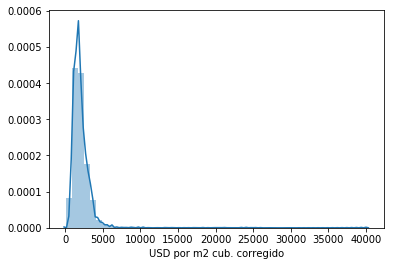

In [617]:
#Se hace un gráfico para analizar la distribución. Si bien se detecta que se asemeja a una distribución normal, 
#se detecta que hay muchos valores que podrían considerarse outliers. 
sns.distplot(df_properatti_final['USD por m2 cub. corregido'].dropna())

**Columna "USD por m2 total"**

In [618]:
#Se analizan los NULL
df_properatti_final['USD por m2 total'].isnull().sum()

49289

In [619]:
#Análisis descriptivo. Hay datos que están mal. Tanto la media como el desvío son muy altos para valores de 
#precio por m2 total
df_properatti_final['USD por m2 total'].describe()

count     66851.000000
mean       2152.892631
std        2764.777201
min           0.600000
25%        1205.515451
50%        1800.000000
75%        2483.985765
max      206333.333333
Name: USD por m2 total, dtype: float64

In [620]:
#Se crea una columna nueva donde se irán corrigiendo los datos de USD por m2 total
df_properatti_final['USD por m2 tot. corregido']=df_properatti_final['USD por m2 total']

In [621]:
#Se hace un corte en la cantidad de m2 para los apartment y se ve que la mayoría de los datos están entre 20 y 500 m2 tot.
#Se asume que esos son los datos correctos ya que los extremos podrían estar mal.
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='apartment']['M2 totales'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(50, 100]          20292
(20, 50]           17810
(100, 200]          7109
(200, 300]          1181
(300, 500]           465
(10, 20]             131
(500, 1000]          111
(1000, 10000]         35
(10000, 400000]        7
(0, 10]                7
Name: M2 totales, dtype: int64

In [622]:
#Se hace un corte en la cantidad de m2 para las casas y se ve que la mayoría de los datos están entre 50 y 10000 m2 tot.
#Se asume que esos son los datos correctos ya que los extremos podrían estar mal.
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='house']['M2 totales'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(200, 300]         6029
(100, 200]         5701
(300, 500]         5001
(500, 1000]        3760
(1000, 10000]      1661
(50, 100]          1573
(20, 50]            265
(10000, 400000]      52
(10, 20]             16
(0, 10]              10
Name: M2 totales, dtype: int64

In [623]:
#Se hace un corte en la cantidad de m2 para los locales y se ve que la mayoría de los datos están entre 20 y 10000 m2 tot.
#Se asume que esos son los datos correctos ya que los extremos podrían estar mal.
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='store']['M2 totales'],
             [0,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(100, 200]         515
(20, 50]           503
(50, 100]          428
(200, 300]         327
(300, 500]         304
(500, 1000]        262
(1000, 10000]      213
(0, 20]             75
(10000, 400000]     11
Name: M2 totales, dtype: int64

In [624]:
#Se hace un corte en la cantidad de m2 para los PH y se ve que la mayoría de los datos están entre 20 y 500 m2 tot.
#Se asume que esos son los datos correctos ya que los extremos podrían estar mal.
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='PH']['M2 totales'],
             [0,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(50, 100]          1557
(100, 200]         1130
(20, 50]            443
(200, 300]          273
(300, 500]           94
(500, 1000]          18
(0, 20]               6
(1000, 10000]         3
(10000, 400000]       1
Name: M2 totales, dtype: int64

In [625]:
#Con estas premisas, se decide considerar únicamente los siguientes datos para valores por m2 totales
#Departamentos: entre 20 y 500 m2 
#Casas: entre 50 y 1000 m2 
#PH: entre 20 y 500 m2 
#Locales: entre 20 y 1000

df_properatti_final.loc[(df_properatti_final['Tipo propiedad']=='apartment') & 
                        (df_properatti_final['M2 totales'].between(20,500)==False),'USD por m2 tot. corregido']=np.NaN

df_properatti_final.loc[(df_properatti_final['Tipo propiedad']=='house') & 
                        (df_properatti_final['M2 totales'].between(50,1000)==False),'USD por m2 tot. corregido']=np.NaN
                        
df_properatti_final.loc[(df_properatti_final['Tipo propiedad']=='PH') & 
                        (df_properatti_final['M2 totales'].between(20,500)==False),'USD por m2 tot. corregido']=np.NaN  

df_properatti_final.loc[(df_properatti_final['Tipo propiedad']=='store') & 
                        (df_properatti_final['M2 totales'].between(20,1000)==False),'USD por m2 tot. corregido']=np.NaN

In [626]:
df_properatti_final['USD por m2 tot. corregido'].describe()

count     64931.000000
mean       2173.464544
std        2734.148928
min           9.875610
25%        1250.000000
50%        1821.925926
75%        2500.000000
max      206333.333333
Name: USD por m2 tot. corregido, dtype: float64

In [627]:
#Se definen los umbrales en función de los cuartile de la misma manera que se hizo con los USD por m2 cubierto
df_properatti_final['Umbral outlier superior']= df_properatti_final[['Tipo propiedad','Ubicación completa',
                                                                     'USD por m2 tot. corregido']].groupby([
    'Tipo propiedad','Ubicación completa']).transform(lambda x:  x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25)))

df_properatti_final['Umbral outlier inferior']= df_properatti_final[['Tipo propiedad','Ubicación completa',
                                                                     'USD por m2 tot. corregido']].groupby([
    'Tipo propiedad','Ubicación completa']).transform(lambda x:  x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25)))

#Se llevan a NaN los valores que quedaron por fuera de esos límites
df_properatti_final.loc[df_properatti_final['USD por m2 tot. corregido'].
                                        between(df_properatti_final['Umbral outlier inferior'],
                                                df_properatti_final['Umbral outlier superior'])==False,
                        'USD por m2 tot. corregido']=np.NaN    

In [628]:
df_properatti_final['USD por m2 tot. corregido'].describe()

count    62096.000000
mean      2037.216638
std       1943.778179
min          9.875610
25%       1250.000000
50%       1800.000000
75%       2435.579151
max      34608.000000
Name: USD por m2 tot. corregido, dtype: float64

In [629]:
#Se completan esos valores con el promedio de USD por m2 total por Ubicación completa. 
df_properatti_final['USD por m2 tot. corregido'] = df_properatti_final[['USD por m2 tot. corregido',
                                                               'Ubicación completa','Tipo propiedad']
                                                             ].groupby(['Ubicación completa','Tipo propiedad']
                                                                      ).transform(lambda x:x.fillna(x.mean()))
df_properatti_final['USD por m2 tot. corregido'].isnull().sum()

2362

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


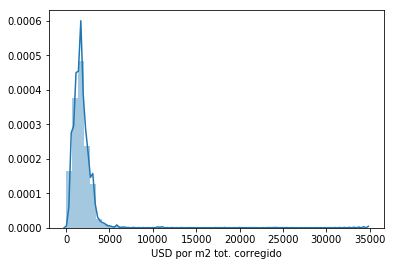

In [630]:
#Se hace un gráfico para analizar la distribución. Si bien se detecta que se asemeja a una distribución normal, 
#se detecta que hay muchos valores que podrían considerarse outliers. 
sns.distplot(df_properatti_final['USD por m2 tot. corregido'].dropna())

Analizamos más profundamente las columnas "USD por m2 cubierto" y "USD por m2 total" para tratar de identificar dónde están los outliers y ver si se pueden corregir.

**USD por m2 total**

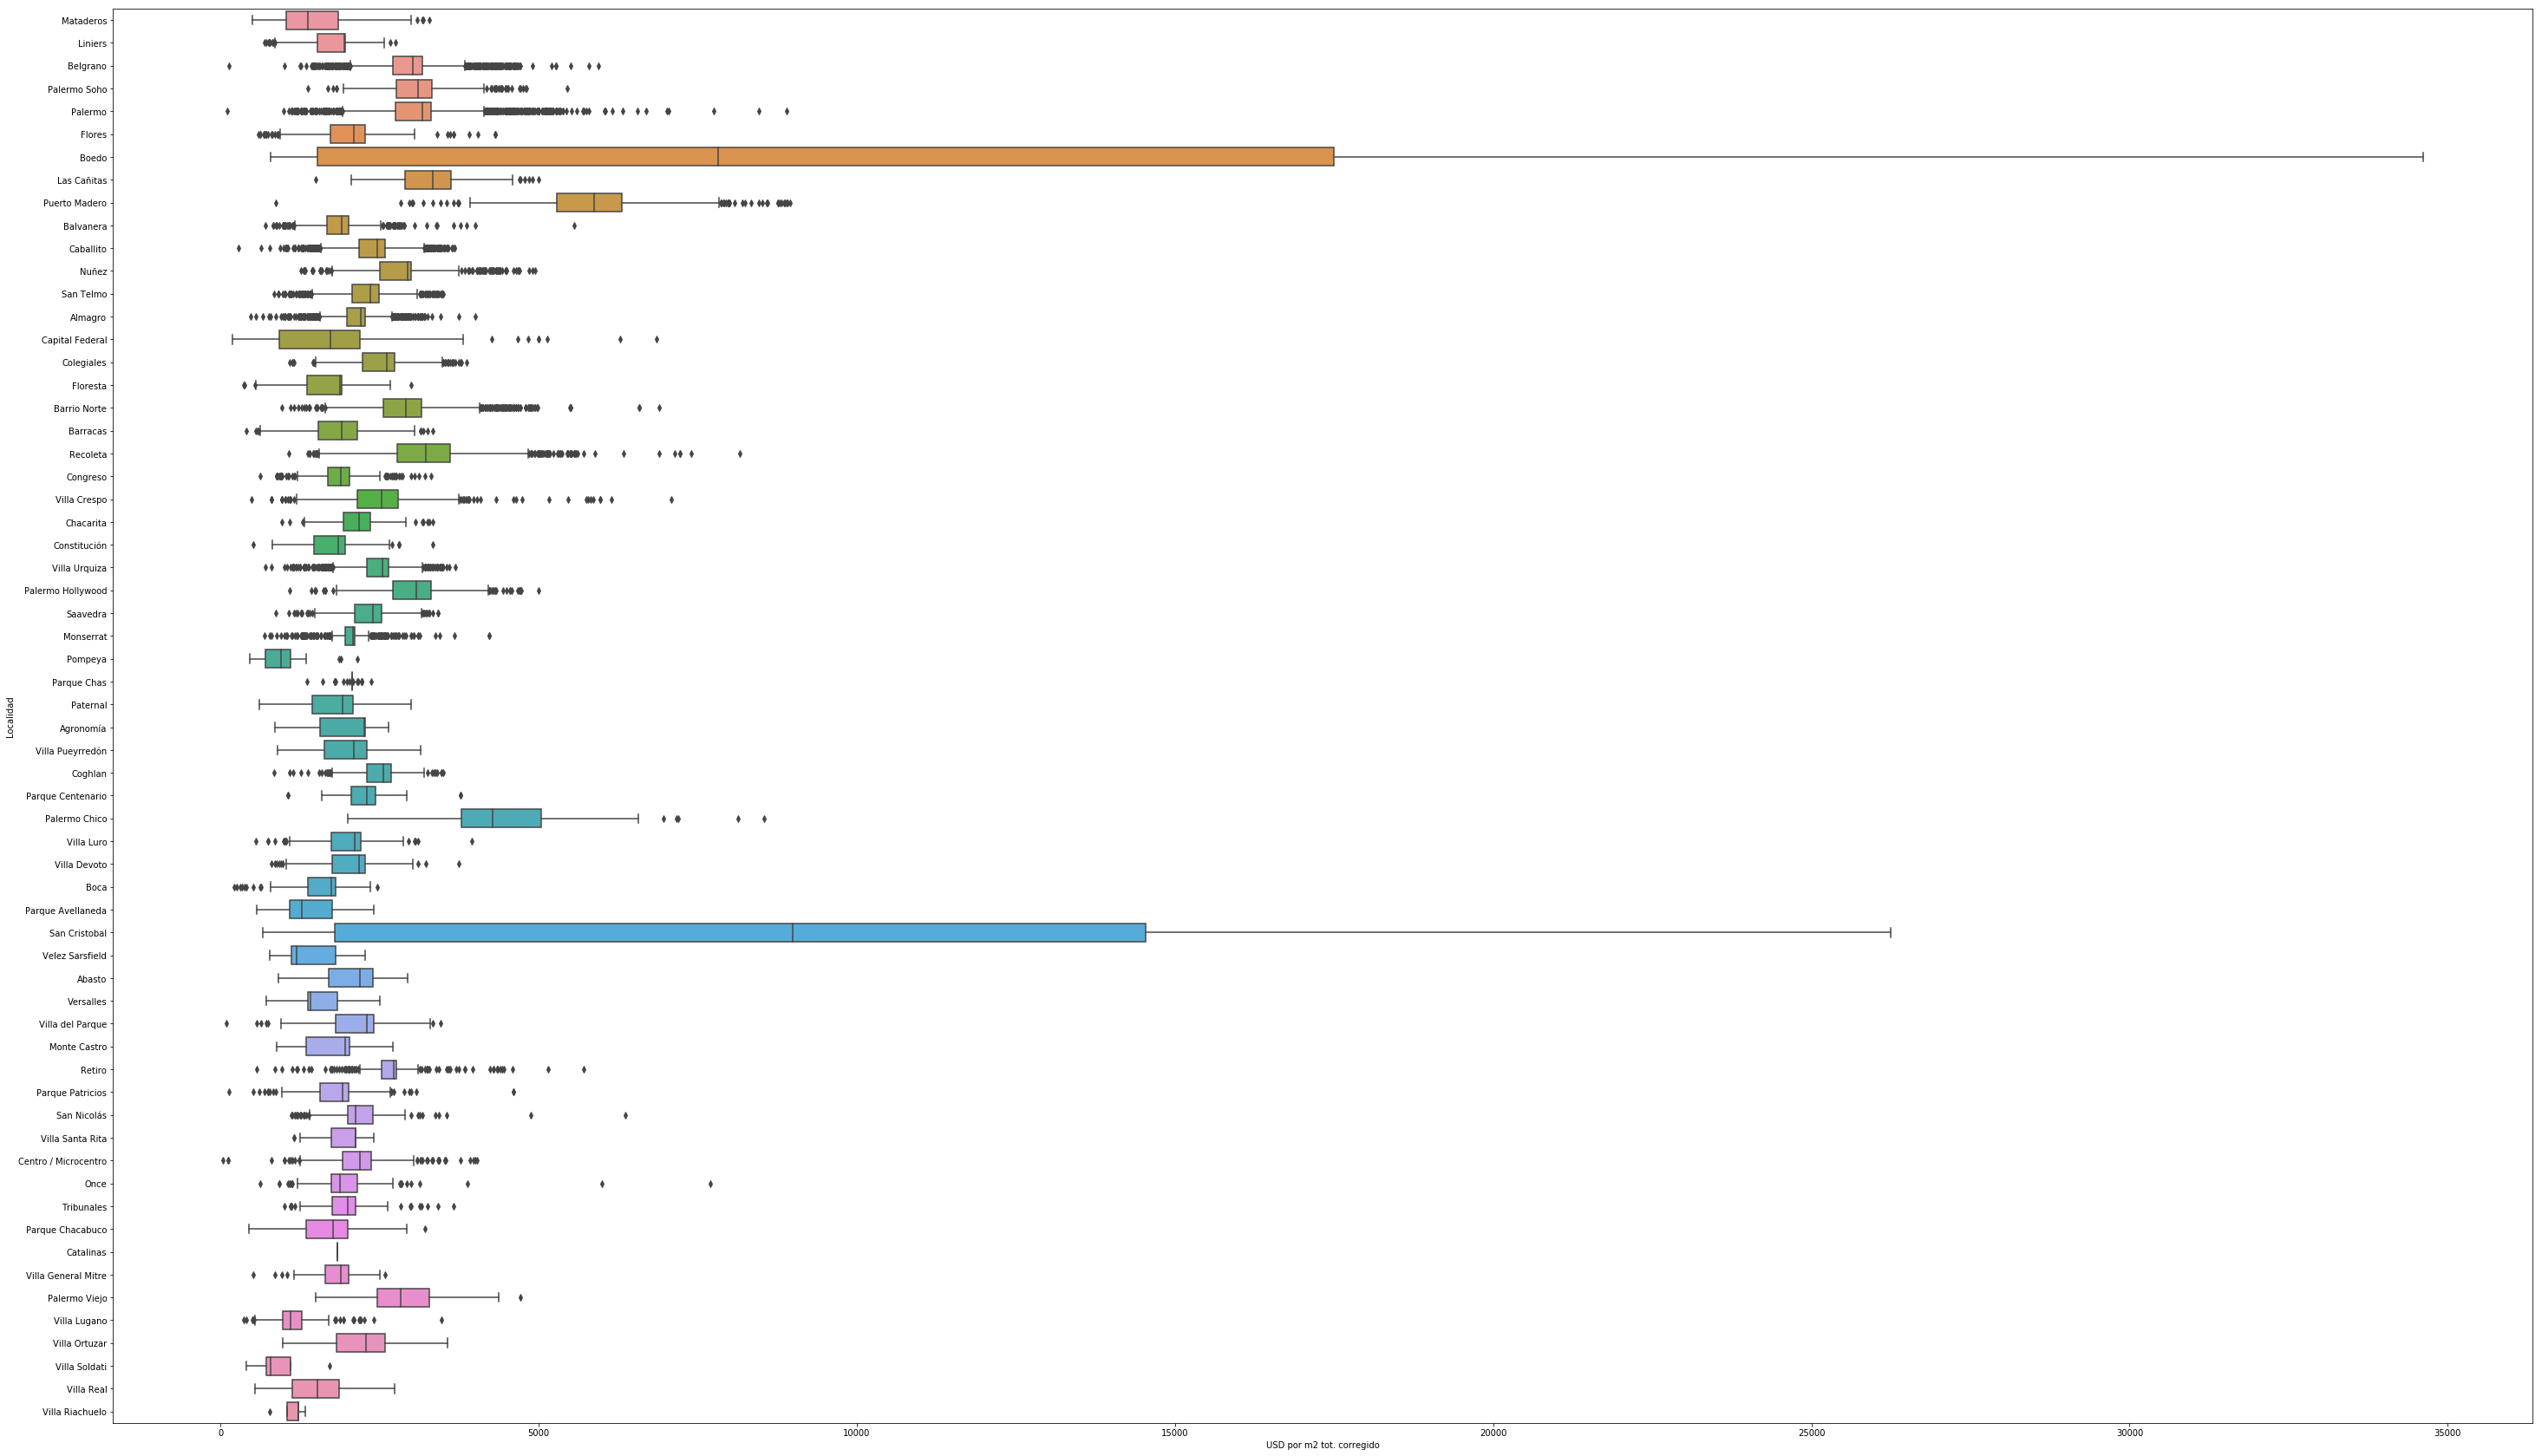

In [631]:
#Se hace un Boxplot por localidad de Capital Federal y se detecta que las lolcalidades de Boedo y San Cristobal 
#tienen una dispersión muy amplia y llegan a valores por m2 total demasiado grandes. 
plt.figure(figsize=(50,30))
sns.boxplot(data=df_properatti_final[df_properatti_final['Provincia']=='Capital Federal'],x='USD por m2 tot. corregido',
            y='Localidad')

In [632]:
#Se hace un corte por cantidad de m2 totales
corte=pd.cut(df_properatti_final['M2 totales'],[0,50,300,500,1000,10000])

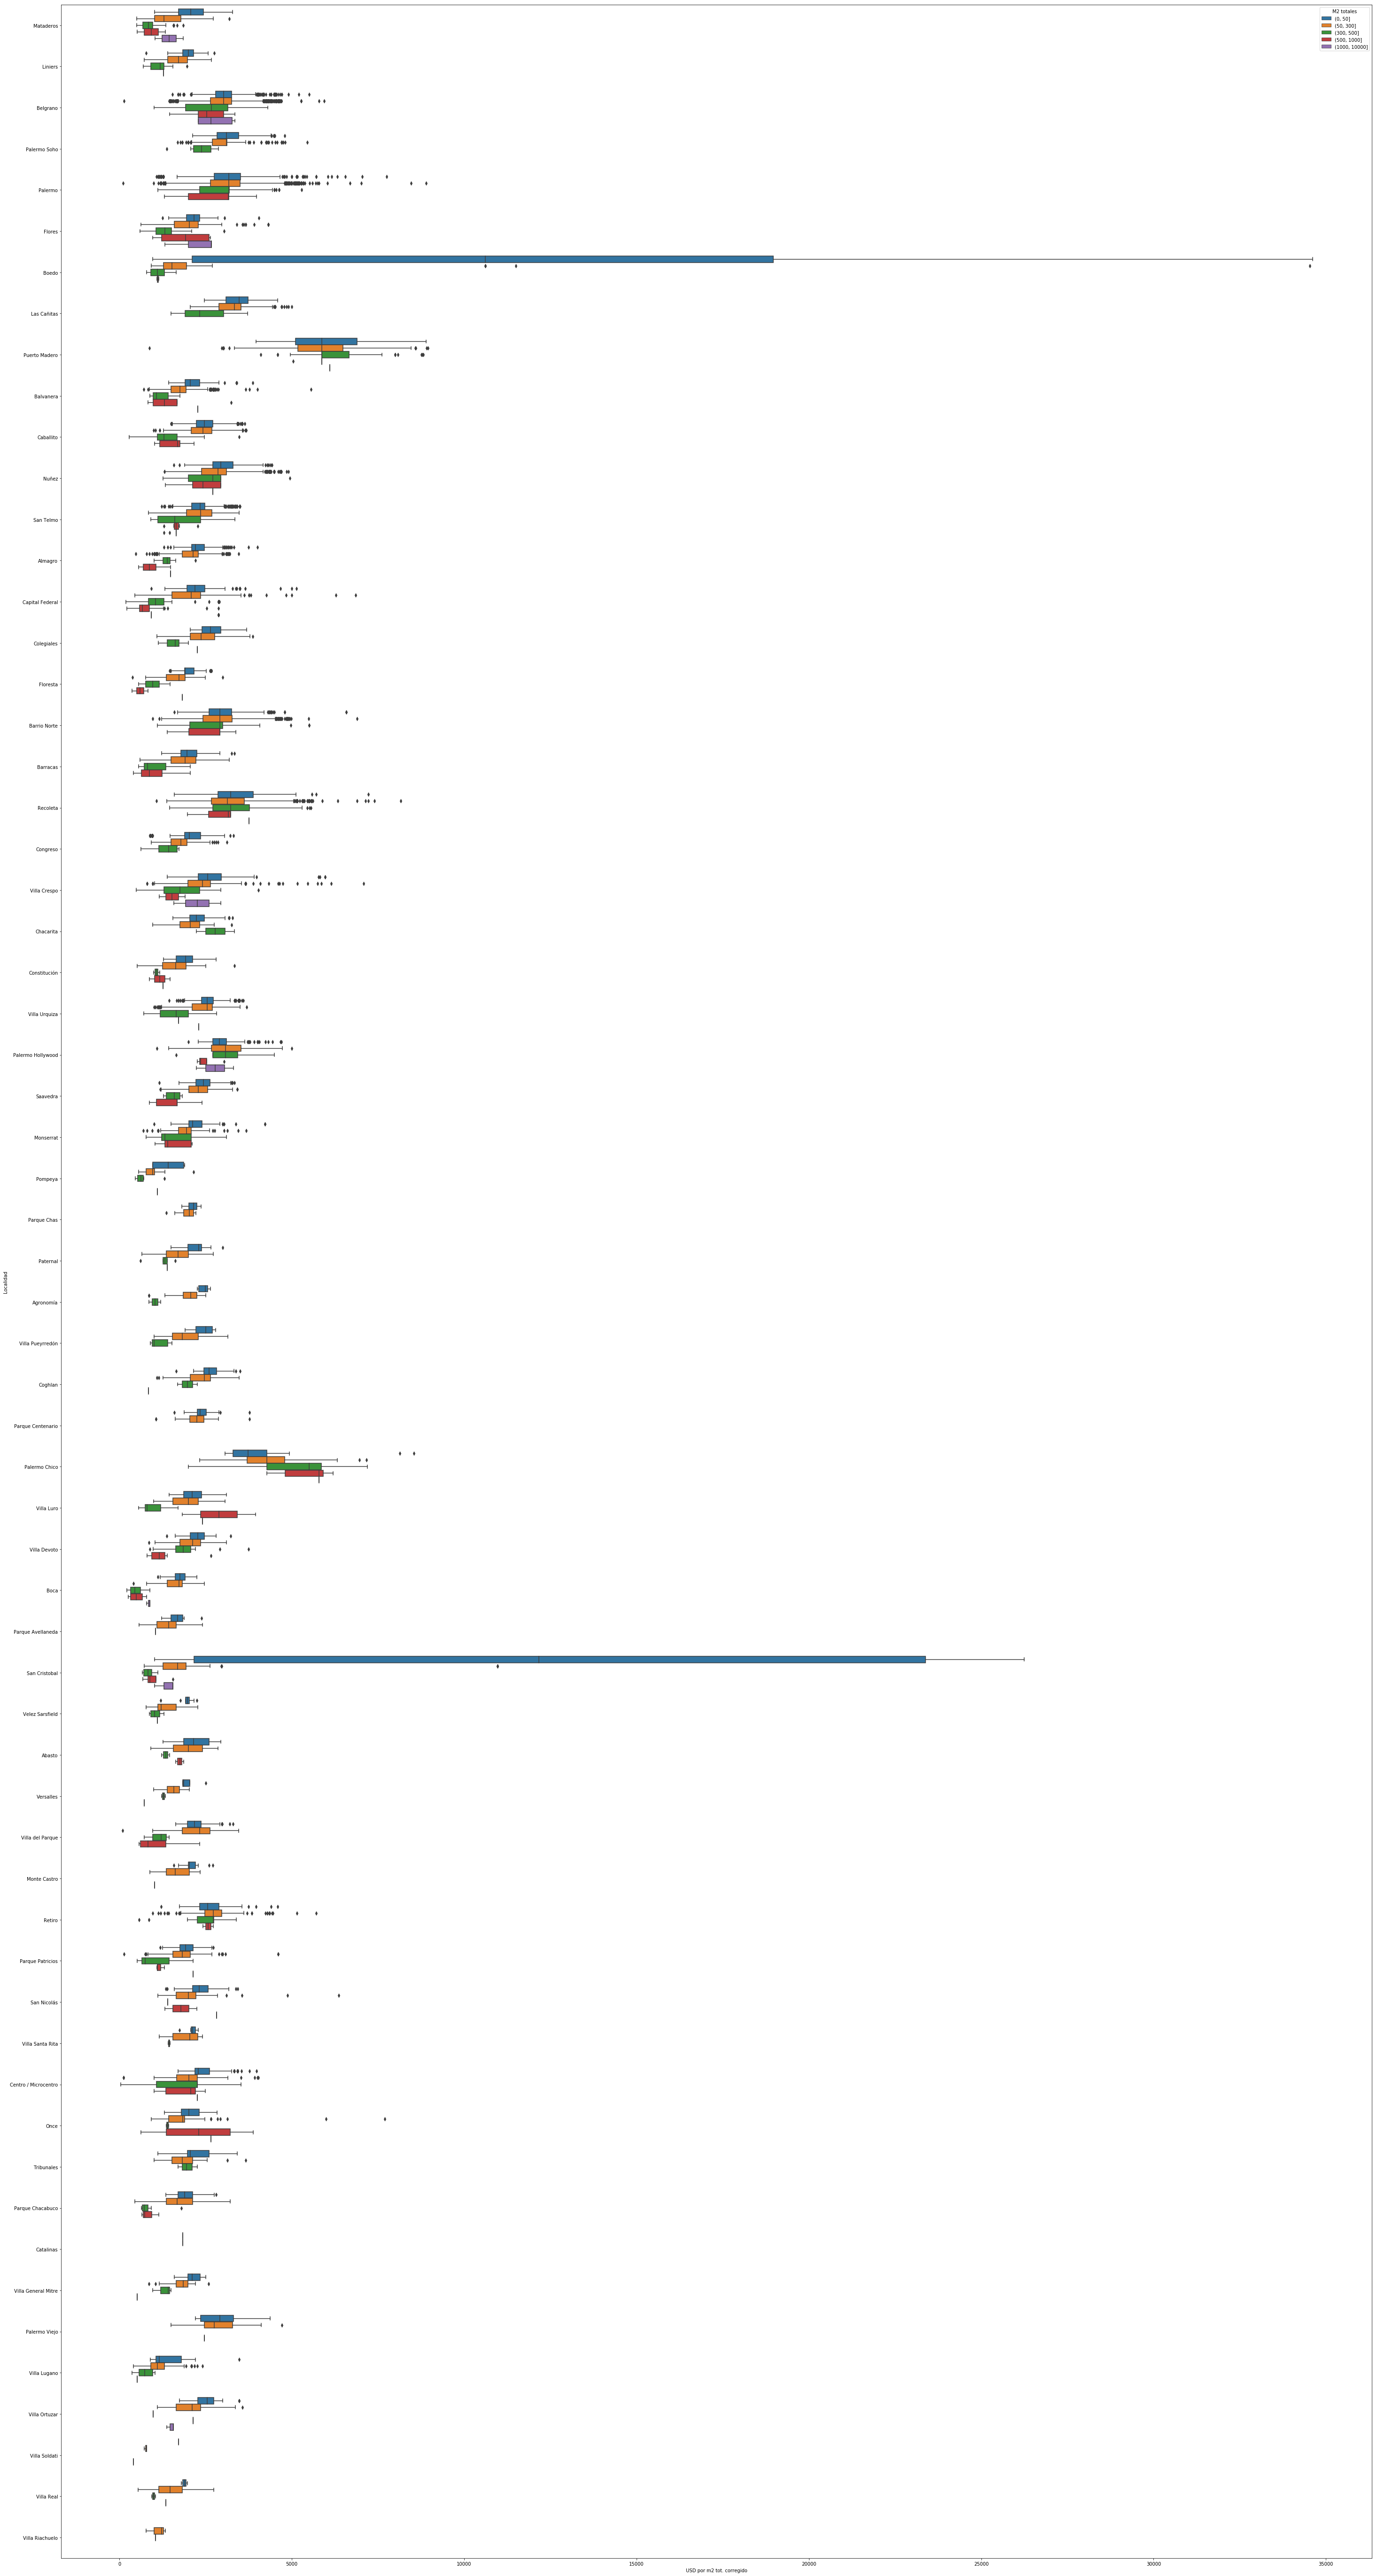

In [633]:
#Con un boxplot se puede ver que los casos más ditorsionados son los que van entre 0 y 50 m2 totales
plt.figure(figsize=(50,100))
sns.boxplot(data=df_properatti_final[df_properatti_final['Provincia']=='Capital Federal'],x='USD por m2 tot. corregido',
            y='Localidad',hue=corte)

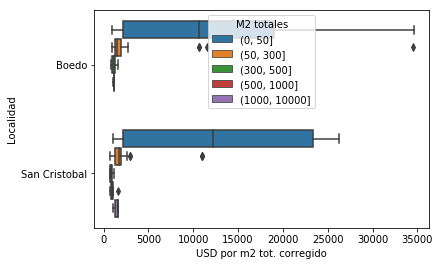

In [634]:
#Tomamos sólo esas dos localidades
sns.boxplot(data=df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal')
                                     |(df_properatti_final['Localidad']=='Boedo')],x='USD por m2 tot. corregido',
            y='Localidad',hue=corte)

In [635]:
#Se analizan esos casos.
#Boedo
df_properatti_final['USD por m2 tot. corregido'][(df_properatti_final['Ubicación completa']=='|Argentina|Capital Federal|Boedo|')
                               & (df_properatti_final['USD por m2 tot. corregido'].isnull()==False)
                               & (df_properatti_final['M2 totales']<=50)].describe()

count      682.000000
mean     11078.830209
std       8466.752057
min        968.421053
25%       2115.633634
50%      10618.736257
75%      18962.183333
max      34608.000000
Name: USD por m2 tot. corregido, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


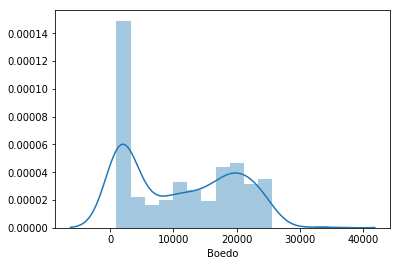

In [636]:
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='Boedo') 
                                 & (df_properatti_final['M2 totales']<=50)]['USD por m2 tot. corregido'],
             bins=15,axlabel='Boedo')

In [637]:
#Se analizan esos casos.
#San Cristobal
df_properatti_final['USD por m2 tot. corregido'][
    (df_properatti_final['Ubicación completa']=='|Argentina|Capital Federal|San Cristobal|')
                               & (df_properatti_final['USD por m2 tot. corregido'].isnull()==False)
                               & (df_properatti_final['M2 totales']<=50)].describe()

count      354.000000
mean     12894.646439
std       9406.167538
min       1016.684197
25%       2161.666667
50%      12167.742857
75%      23390.000000
max      26241.636364
Name: USD por m2 tot. corregido, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


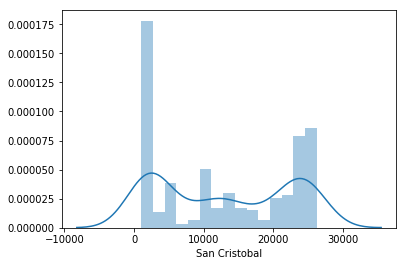

In [638]:
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') 
                                 & (df_properatti_final['M2 totales']<=50)]['USD por m2 tot. corregido'],
             bins=15,axlabel='San Cristobal')

Se nota que son distribuciones bimodales, mientras que en general, para el resto de las localidades, se trata de distribuciones con una marcada tendencia normal. Ejemplos:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.

Text(0.5, 1.0, 'Villa Urquiza')

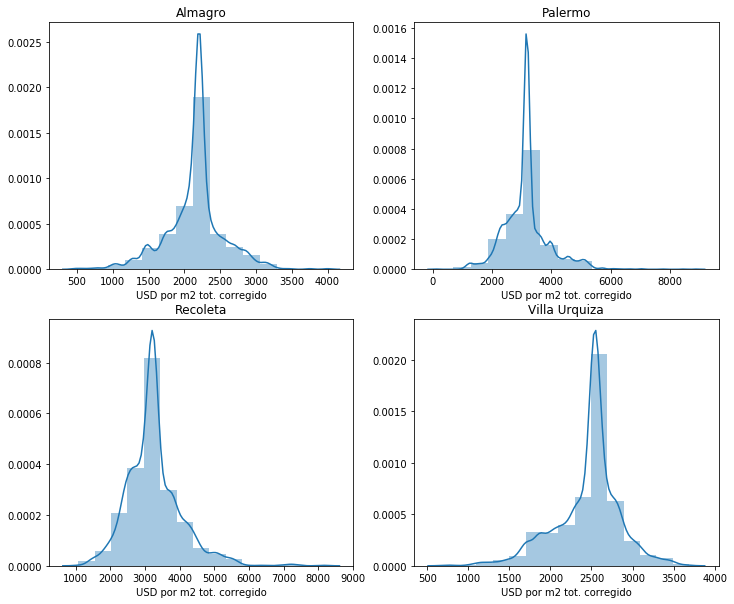

In [639]:
plt.figure(figsize=(12, 10))

#Almagro
plt.subplot(221)
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='Almagro')]['USD por m2 tot. corregido'],
             bins=15)
plt.title('Almagro')

#Palermo
plt.subplot(222)
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='Palermo')]['USD por m2 tot. corregido'],
             bins=15)
plt.title('Palermo')

#Recoleta
plt.subplot(223)
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='Recoleta')]['USD por m2 tot. corregido'],
             bins=15)
plt.title('Recoleta')

#Villa Urquiza
plt.subplot(224)
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='Villa Urquiza')]['USD por m2 tot. corregido'],
             bins=15)
plt.title('Villa Urquiza')



In [640]:
#Se busca llevar la distribución de Boedo a Normal
df_properatti_final[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50)]['USD por m2 tot. corregido'].describe(
    percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

count      682.000000
mean     11078.830209
std       8466.752057
min        968.421053
10%       1233.333333
20%       1684.242424
30%       2460.055292
40%       5756.666667
50%      10618.736257
60%      14255.400000
70%      17869.370000
80%      20105.333333
90%      22575.630000
100%     34608.000000
max      34608.000000
Name: USD por m2 tot. corregido, dtype: float64

In [641]:
#Se toma como valor máximo el percetil 0.4 (5800)
media_boedo=df_properatti_final[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 tot. corregido']<5800)]['USD por m2 tot. corregido'].mean()

desvio_boedo=df_properatti_final[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 tot. corregido']<5800)]['USD por m2 tot. corregido'].std()

In [642]:
#Se lleva a distribución normal
df_properatti_final.loc[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 tot. corregido']>5800),
                        'USD por m2 tot. corregido']=df_properatti_final.loc[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 tot. corregido']>5800),'USD por m2 tot. corregido'].apply(
    lambda x: np.random.normal(loc = media_boedo, scale = desvio_boedo))

In [643]:
df_properatti_final['USD por m2 tot. corregido'][(df_properatti_final['Localidad']=='Boedo')&
                    (df_properatti_final['USD por m2 tot. corregido']>=50)].describe()

count      845.000000
mean      2515.713826
std       2365.842622
min         91.519213
25%       1285.714286
50%       1911.428571
75%       2830.241463
max      34534.482759
Name: USD por m2 tot. corregido, dtype: float64

In [644]:
#Con esta modificación se detectó que hay valores que pueden ser menores a 0, se los lleva al valor de la media
df_properatti_final.loc[(df_properatti_final['Localidad']=='Boedo') 
                        & (df_properatti_final['USD por m2 tot. corregido']<0),:]=media_boedo

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


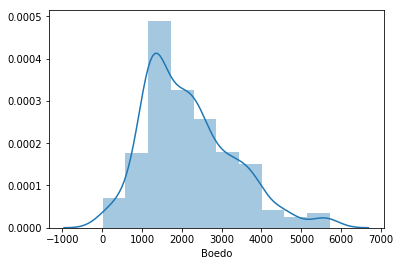

In [645]:
#Se grafica 
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='Boedo') 
                                 & (df_properatti_final['M2 totales']<=50)]['USD por m2 tot. corregido'],bins=10,
             axlabel='Boedo')

In [646]:
#Se busca llevar la distribución de San Cristobal a Normal
df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50)]['USD por m2 tot. corregido'].describe(
    percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


count      354.000000
mean     12894.646439
std       9406.167538
min       1016.684197
10%       1849.186047
20%       2089.696970
30%       2769.366279
40%       9146.500000
50%      12167.742857
60%      16314.857143
70%      22538.540385
80%      23911.700000
90%      24986.969697
100%     26241.636364
max      26241.636364
Name: USD por m2 tot. corregido, dtype: float64

In [647]:
#Se toma como valor máximo el percetil 0.4 (9200)
media_sancris=df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 tot. corregido']<9200)]['USD por m2 tot. corregido'].mean()

desvio_sancris=df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 tot. corregido']<9200)]['USD por m2 tot. corregido'].std()

In [648]:
#Se lleva a distribución normal
df_properatti_final.loc[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 tot. corregido']>9200),
                        'USD por m2 tot. corregido']=df_properatti_final.loc[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 tot. corregido']>9200),'USD por m2 tot. corregido'].apply(
    lambda x: np.random.normal(loc = media_sancris, scale = desvio_sancris))

In [649]:
#Con esta modificación se detectó que hay valores que pueden ser menores a 0, se los lleva al valor de la media
df_properatti_final.loc[(df_properatti_final['Localidad']=='San Cristobal') & 
                        (df_properatti_final['USD por m2 tot. corregido']<0),:]=media_sancris

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


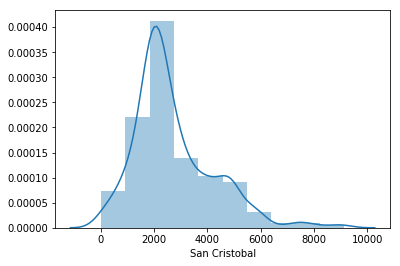

In [650]:
#Se grafica
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                                 (df_properatti_final['M2 totales']<=50)]['USD por m2 tot. corregido'],
             bins=10,axlabel='San Cristobal')

**USD por m2 cubierto**

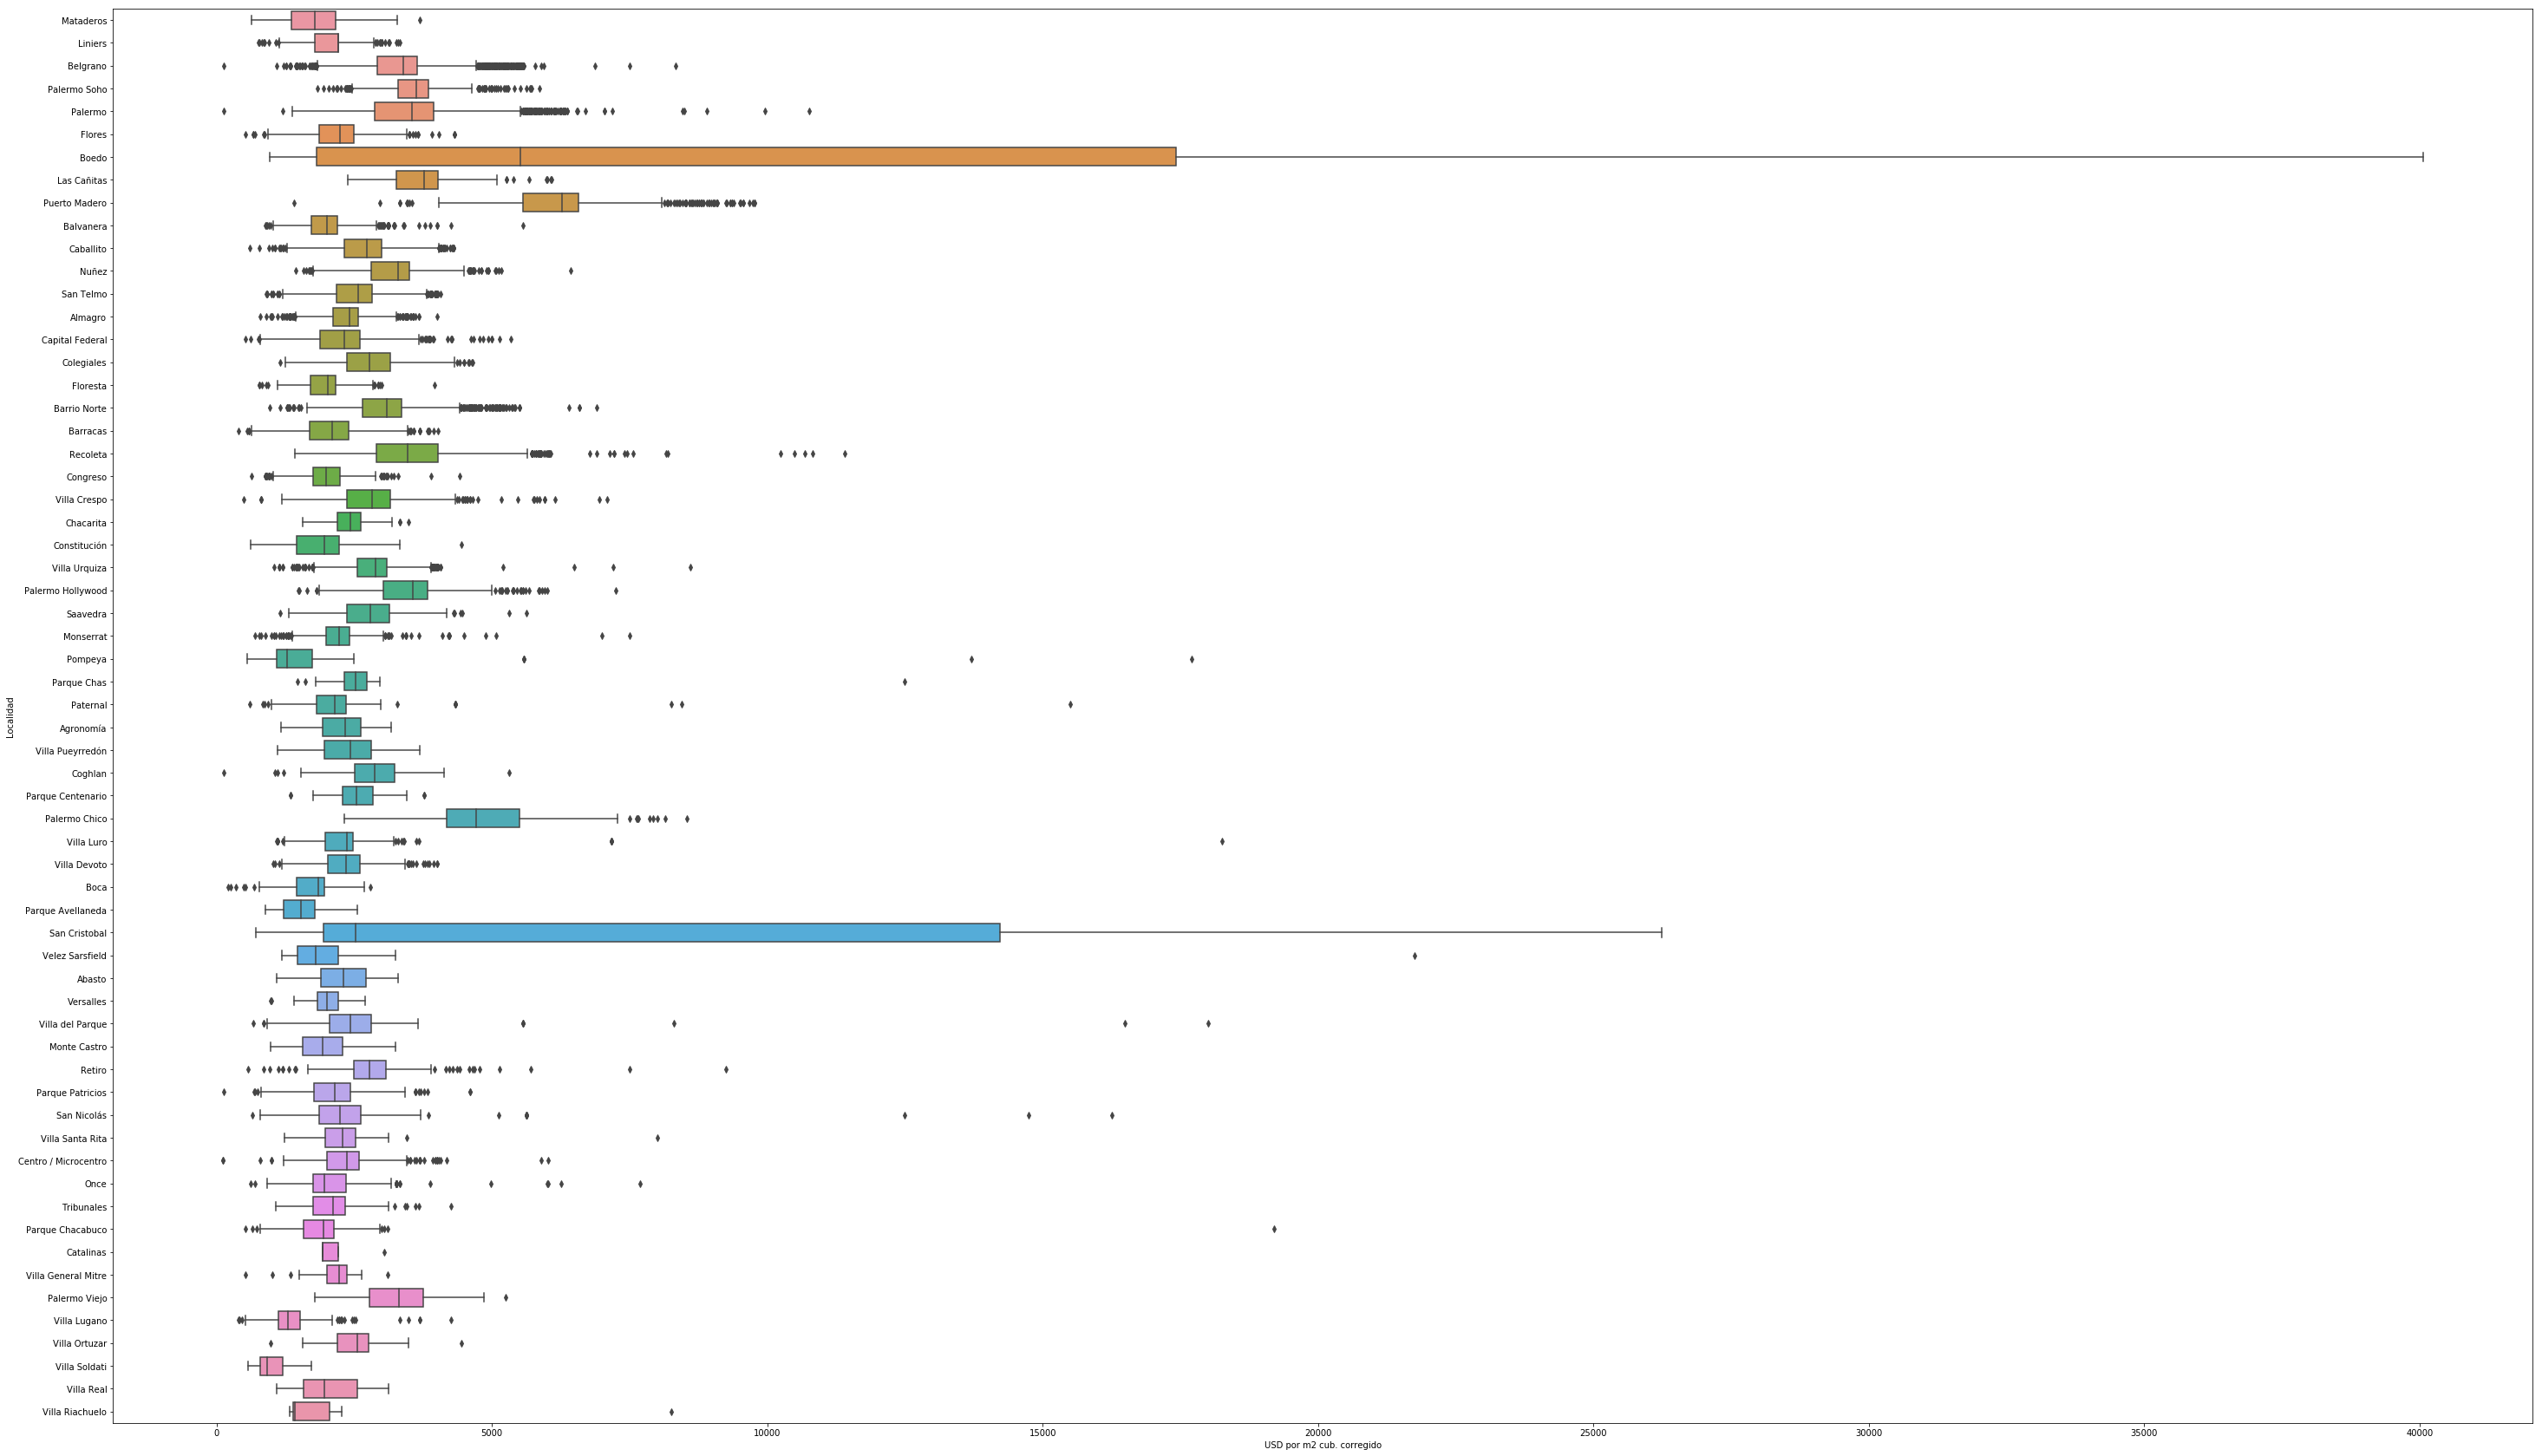

In [651]:
#Se hace un Boxplot por localidad de Capital Federal y se detecta que las lolcalidades de Boedo y San Cristobal 
#tienen una dispersión muy amplia y llegan a valores por m2 cubierto demasiado grandes. 
plt.figure(figsize=(50,30))
sns.boxplot(data=df_properatti_final[df_properatti_final['Provincia']=='Capital Federal'],x='USD por m2 cub. corregido',
            y='Localidad')

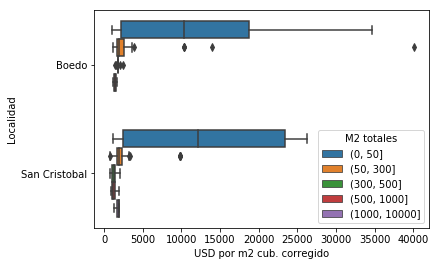

In [652]:
#Tomamos sólo esas dos localidades
sns.boxplot(data=df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal')
                                     |(df_properatti_final['Localidad']=='Boedo')],x='USD por m2 cub. corregido',
            y='Localidad',hue=corte)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


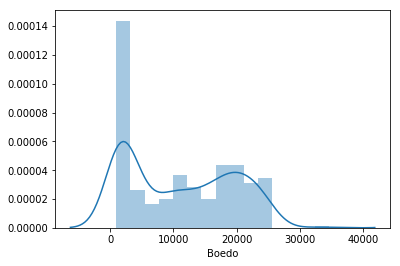

In [653]:
#Boedo, se grafica
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='Boedo') & 
                                 (df_properatti_final['M2 totales']<=50)]['USD por m2 cub. corregido'],bins=15,
             axlabel='Boedo')

In [654]:
#Se busca llevar a normal
df_properatti_final[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50)]['USD por m2 cub. corregido'].describe(
    percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

count      673.000000
mean     11043.273296
std       8368.336719
min        968.421053
10%       1233.333333
20%       1798.890216
30%       2825.000000
40%       5835.333333
50%      10376.111947
60%      14186.666667
70%      17539.703030
80%      20076.666667
90%      22535.040000
100%     34608.000000
max      34608.000000
Name: USD por m2 cub. corregido, dtype: float64

In [655]:
#Se toma como valor máximo el percetil 0.4 (5700)
media_boedo=df_properatti_final[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 cub. corregido']<5700)]['USD por m2 cub. corregido'].mean()

desvio_boedo=df_properatti_final[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 cub. corregido']<5700)]['USD por m2 cub. corregido'].std()

In [656]:
#Se lleva a distribución normal
df_properatti_final.loc[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 cub. corregido']>5700),
                       'USD por m2 cub. corregido']=df_properatti_final.loc[(df_properatti_final['Localidad']=='Boedo') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 cub. corregido']>5700),'USD por m2 cub. corregido'].apply(
    lambda x: np.random.normal(loc = media_boedo, scale = desvio_boedo))

In [657]:
#Con esta modificación se detectó que hay valores que pueden ser menores a 0, se los lleva al valor de la media
df_properatti_final.loc[(df_properatti_final['Localidad']=='Boedo') & 
                        (df_properatti_final['USD por m2 cub. corregido']<0),:]=media_boedo

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


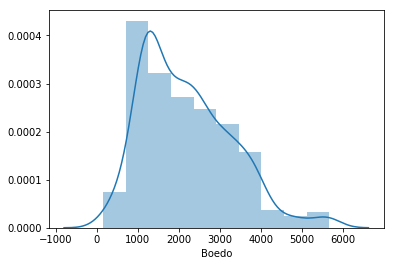

In [658]:
#Se grafica
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='Boedo') & 
                                 (df_properatti_final['M2 totales']<=50)]['USD por m2 cub. corregido'],bins=10,axlabel='Boedo')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


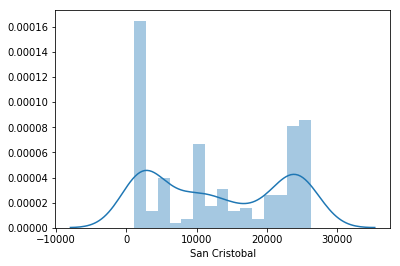

In [659]:
#San Cristobal, se grafica
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                                 (df_properatti_final['M2 totales']<=50)]['USD por m2 cub. corregido'],bins=15,
             axlabel='San Cristobal')

In [660]:
#Se busca llevar a normal
df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50)][
    'USD por m2 cub. corregido'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

count      348.000000
mean     12966.469904
std       9230.892744
min       1117.823250
10%       1980.000000
20%       2310.000000
30%       4750.000000
40%       9756.780443
50%      12165.057143
60%      16269.428571
70%      22472.900000
80%      23891.720000
90%      24986.969697
100%     26241.636364
max      26241.636364
Name: USD por m2 cub. corregido, dtype: float64

In [661]:
#Se toma como valor máximo el percetil 0.4 (9800)
media_sancris=df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 cub. corregido']<9800)]['USD por m2 cub. corregido'].mean()

desvio_sancris=df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 cub. corregido']<9800)]['USD por m2 cub. corregido'].std()

In [662]:
#Se lleva a distribución normal
df_properatti_final.loc[(df_properatti_final['Localidad']=='San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 cub. corregido']>9800),
                        'USD por m2 cub. corregido']=df_properatti_final.loc[(df_properatti_final['Localidad']==
                                                                              'San Cristobal') & 
                    (df_properatti_final['M2 totales']<=50) & 
                    (df_properatti_final['USD por m2 cub. corregido']>9800),
                                                                             'USD por m2 cub. corregido'].apply(
    lambda x: np.random.normal(loc = media_sancris, scale = desvio_sancris))

In [663]:
#Con esta modificación se detectó que hay valores que pueden ser menores a 0, se los lleva al valor de la media
df_properatti_final.loc[(df_properatti_final['Localidad']=='San Cristobal') & 
                        (df_properatti_final['USD por m2 cub. corregido']<0),:]=media_sancris

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


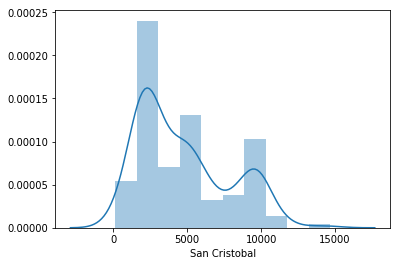

In [664]:
#Se grafica
sns.distplot(df_properatti_final[(df_properatti_final['Localidad']=='San Cristobal') & 
                                 (df_properatti_final['M2 totales']<=50)]['USD por m2 cub. corregido'],
             bins=10,axlabel='San Cristobal')

In [665]:
df_properatti_final['USD por m2 cub. corregido'].describe()

count    115078.000000
mean       2027.929783
std        1072.334070
min         102.820000
25%        1363.820235
50%        1847.826087
75%        2454.242032
max       40060.000000
Name: USD por m2 cub. corregido, dtype: float64

In [666]:
df_properatti_final['USD por m2 tot. corregido'].describe()

count    113778.000000
mean       1750.810377
std         959.466664
min           9.536518
25%        1146.520132
50%        1655.464996
75%        2200.000000
max       34534.482759
Name: USD por m2 tot. corregido, dtype: float64

#### 4. Limpieza final de la tabla

Se eliminan los registros que quedaron con valores nulos en USD por m2 cubierto y USD por m2 total. Son datos que nos se pudieron corregir y, por lo tanto, no servirán para estimar precios de una propiedad.

In [667]:
#Son en total 2629 registros
np.any(df_properatti_final[['USD por m2 cub. corregido','USD por m2 tot. corregido']].isnull(),axis=1).value_counts()

False    113511
True       2629
dtype: int64

In [668]:
df_properatti_final.shape

(116140, 25)

In [669]:
df_properatti_final=df_properatti_final[(df_properatti_final['USD por m2 cub. corregido'].isnull()==False)
                                       &(df_properatti_final['USD por m2 tot. corregido'].isnull()==False)]
df_properatti_final.shape

(113511, 25)

Se hace un boxplot por provincia para ver cómo quedaron las distibuciones.

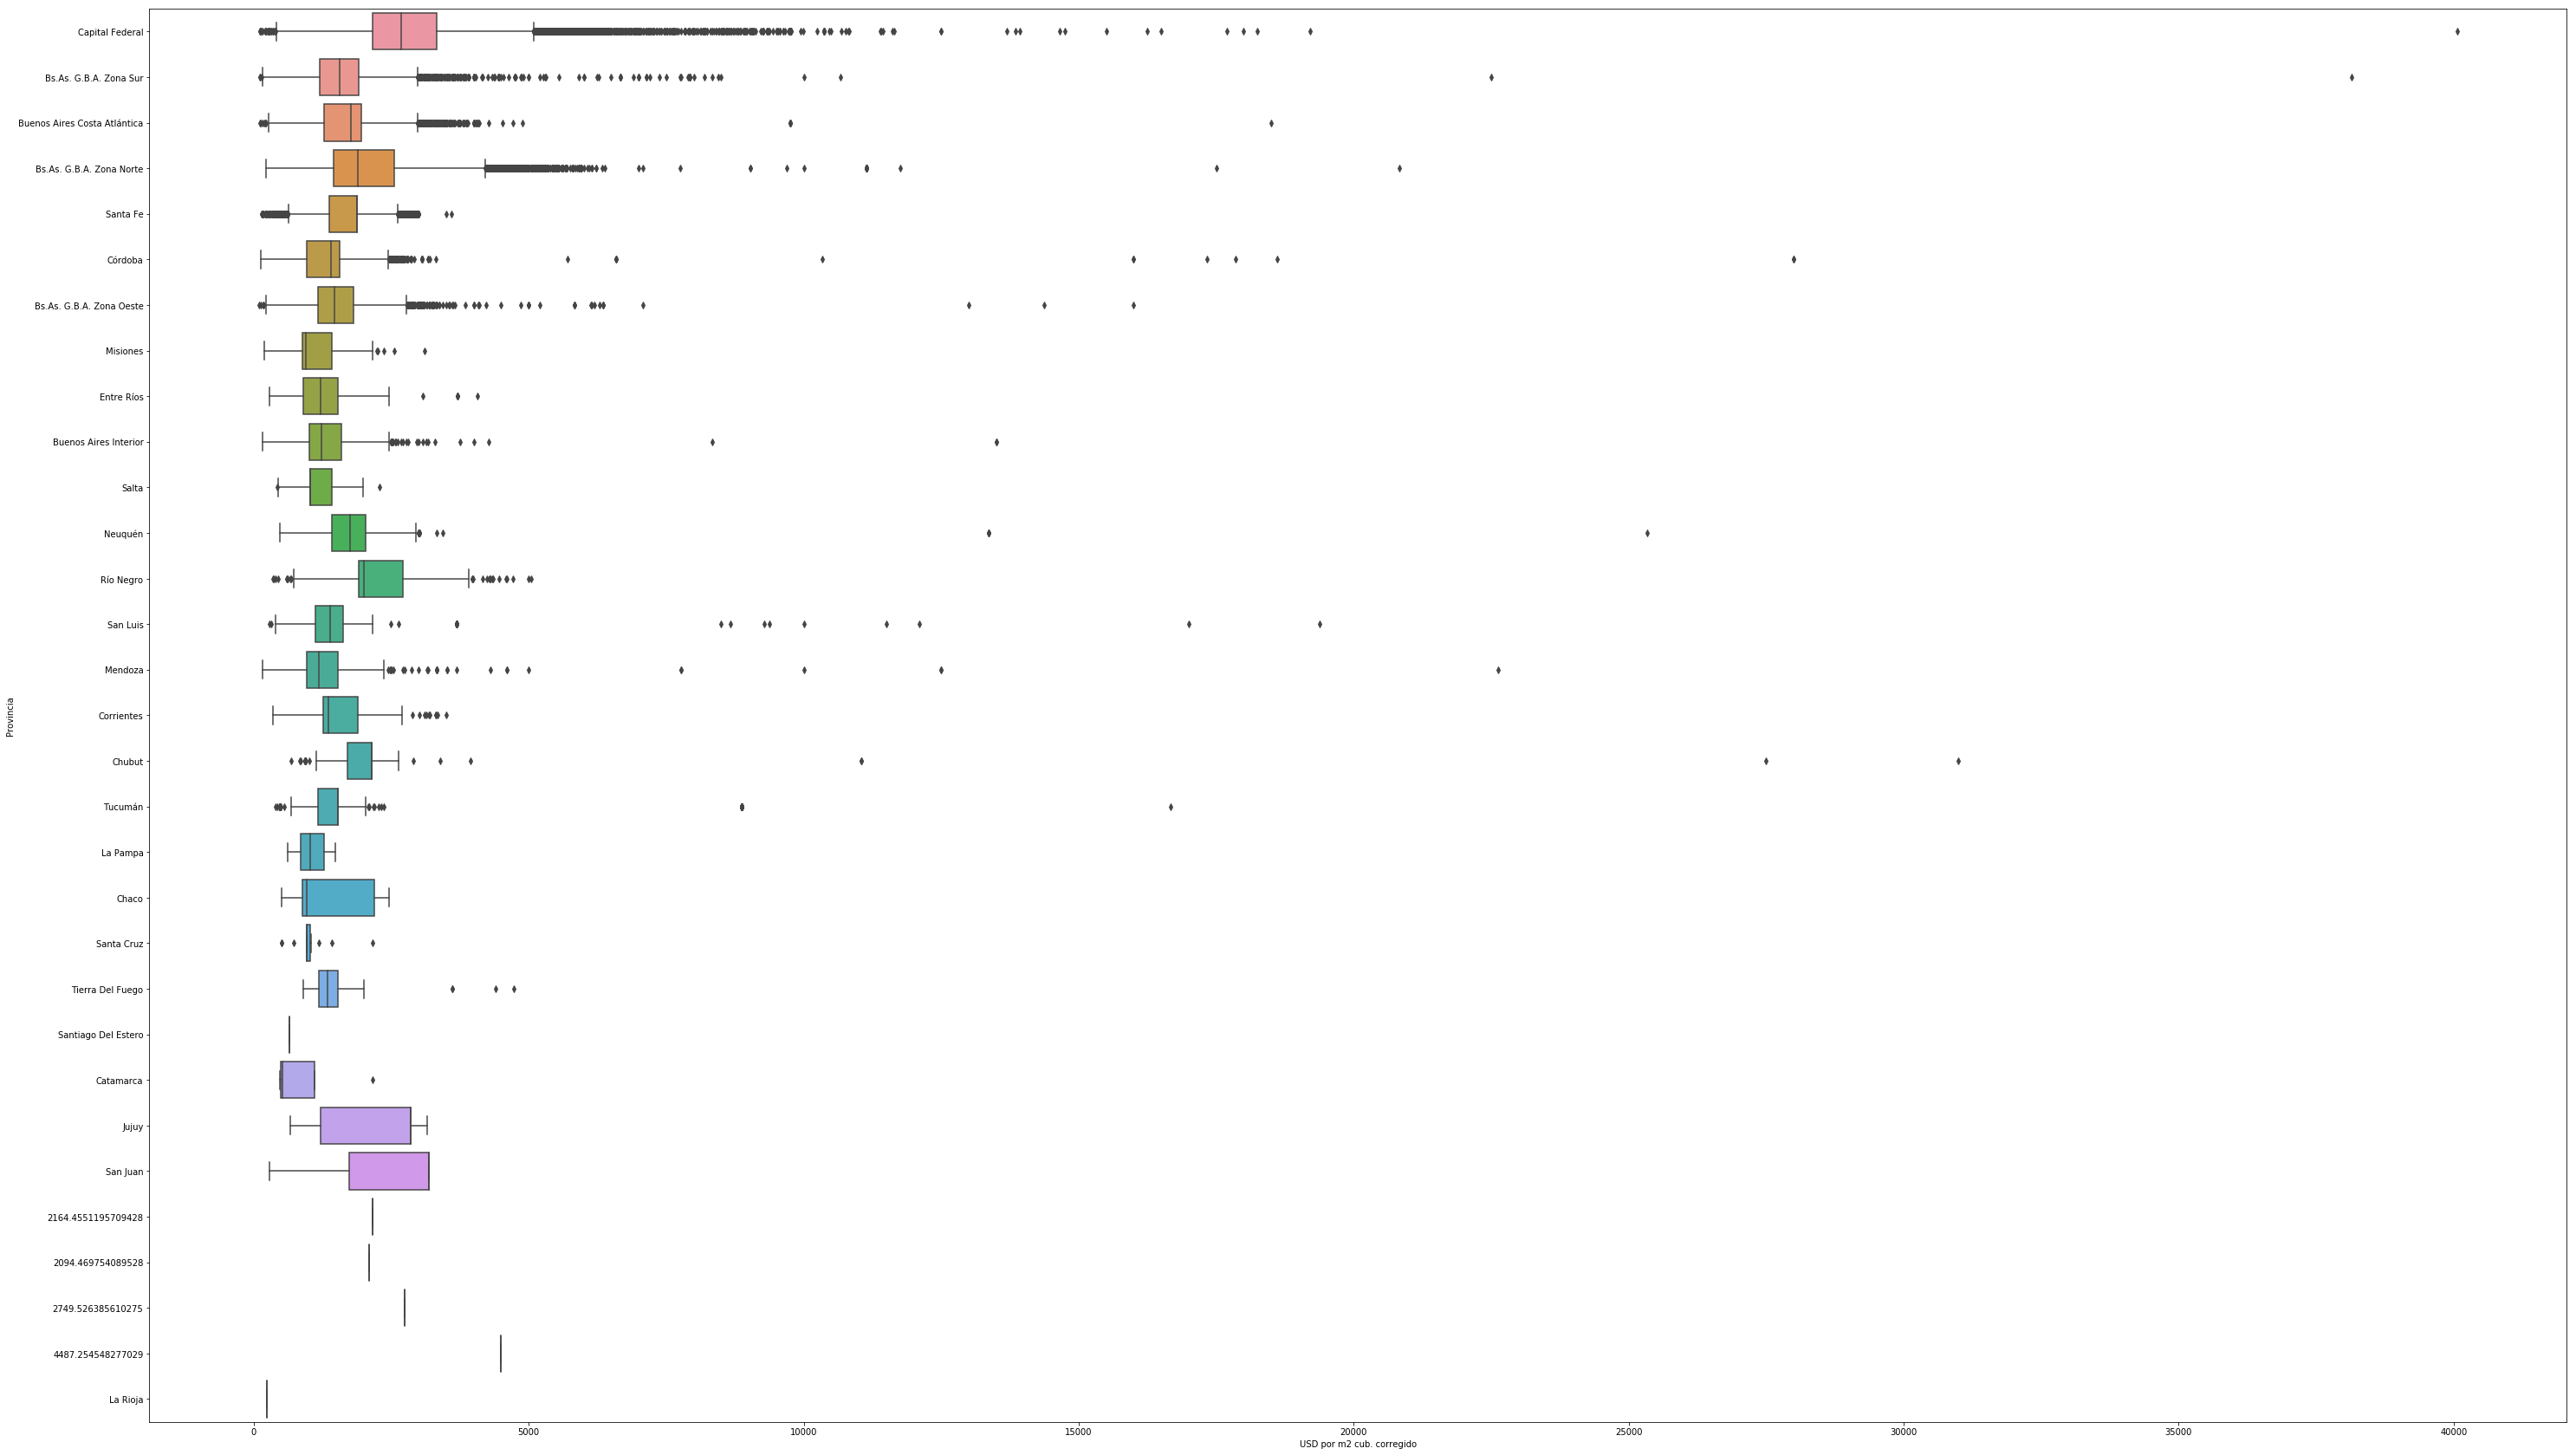

In [670]:
#USD por m2 cubierto
plt.figure(figsize=(50,30))
sns.boxplot(data=df_properatti_final,x='USD por m2 cub. corregido',y='Provincia')

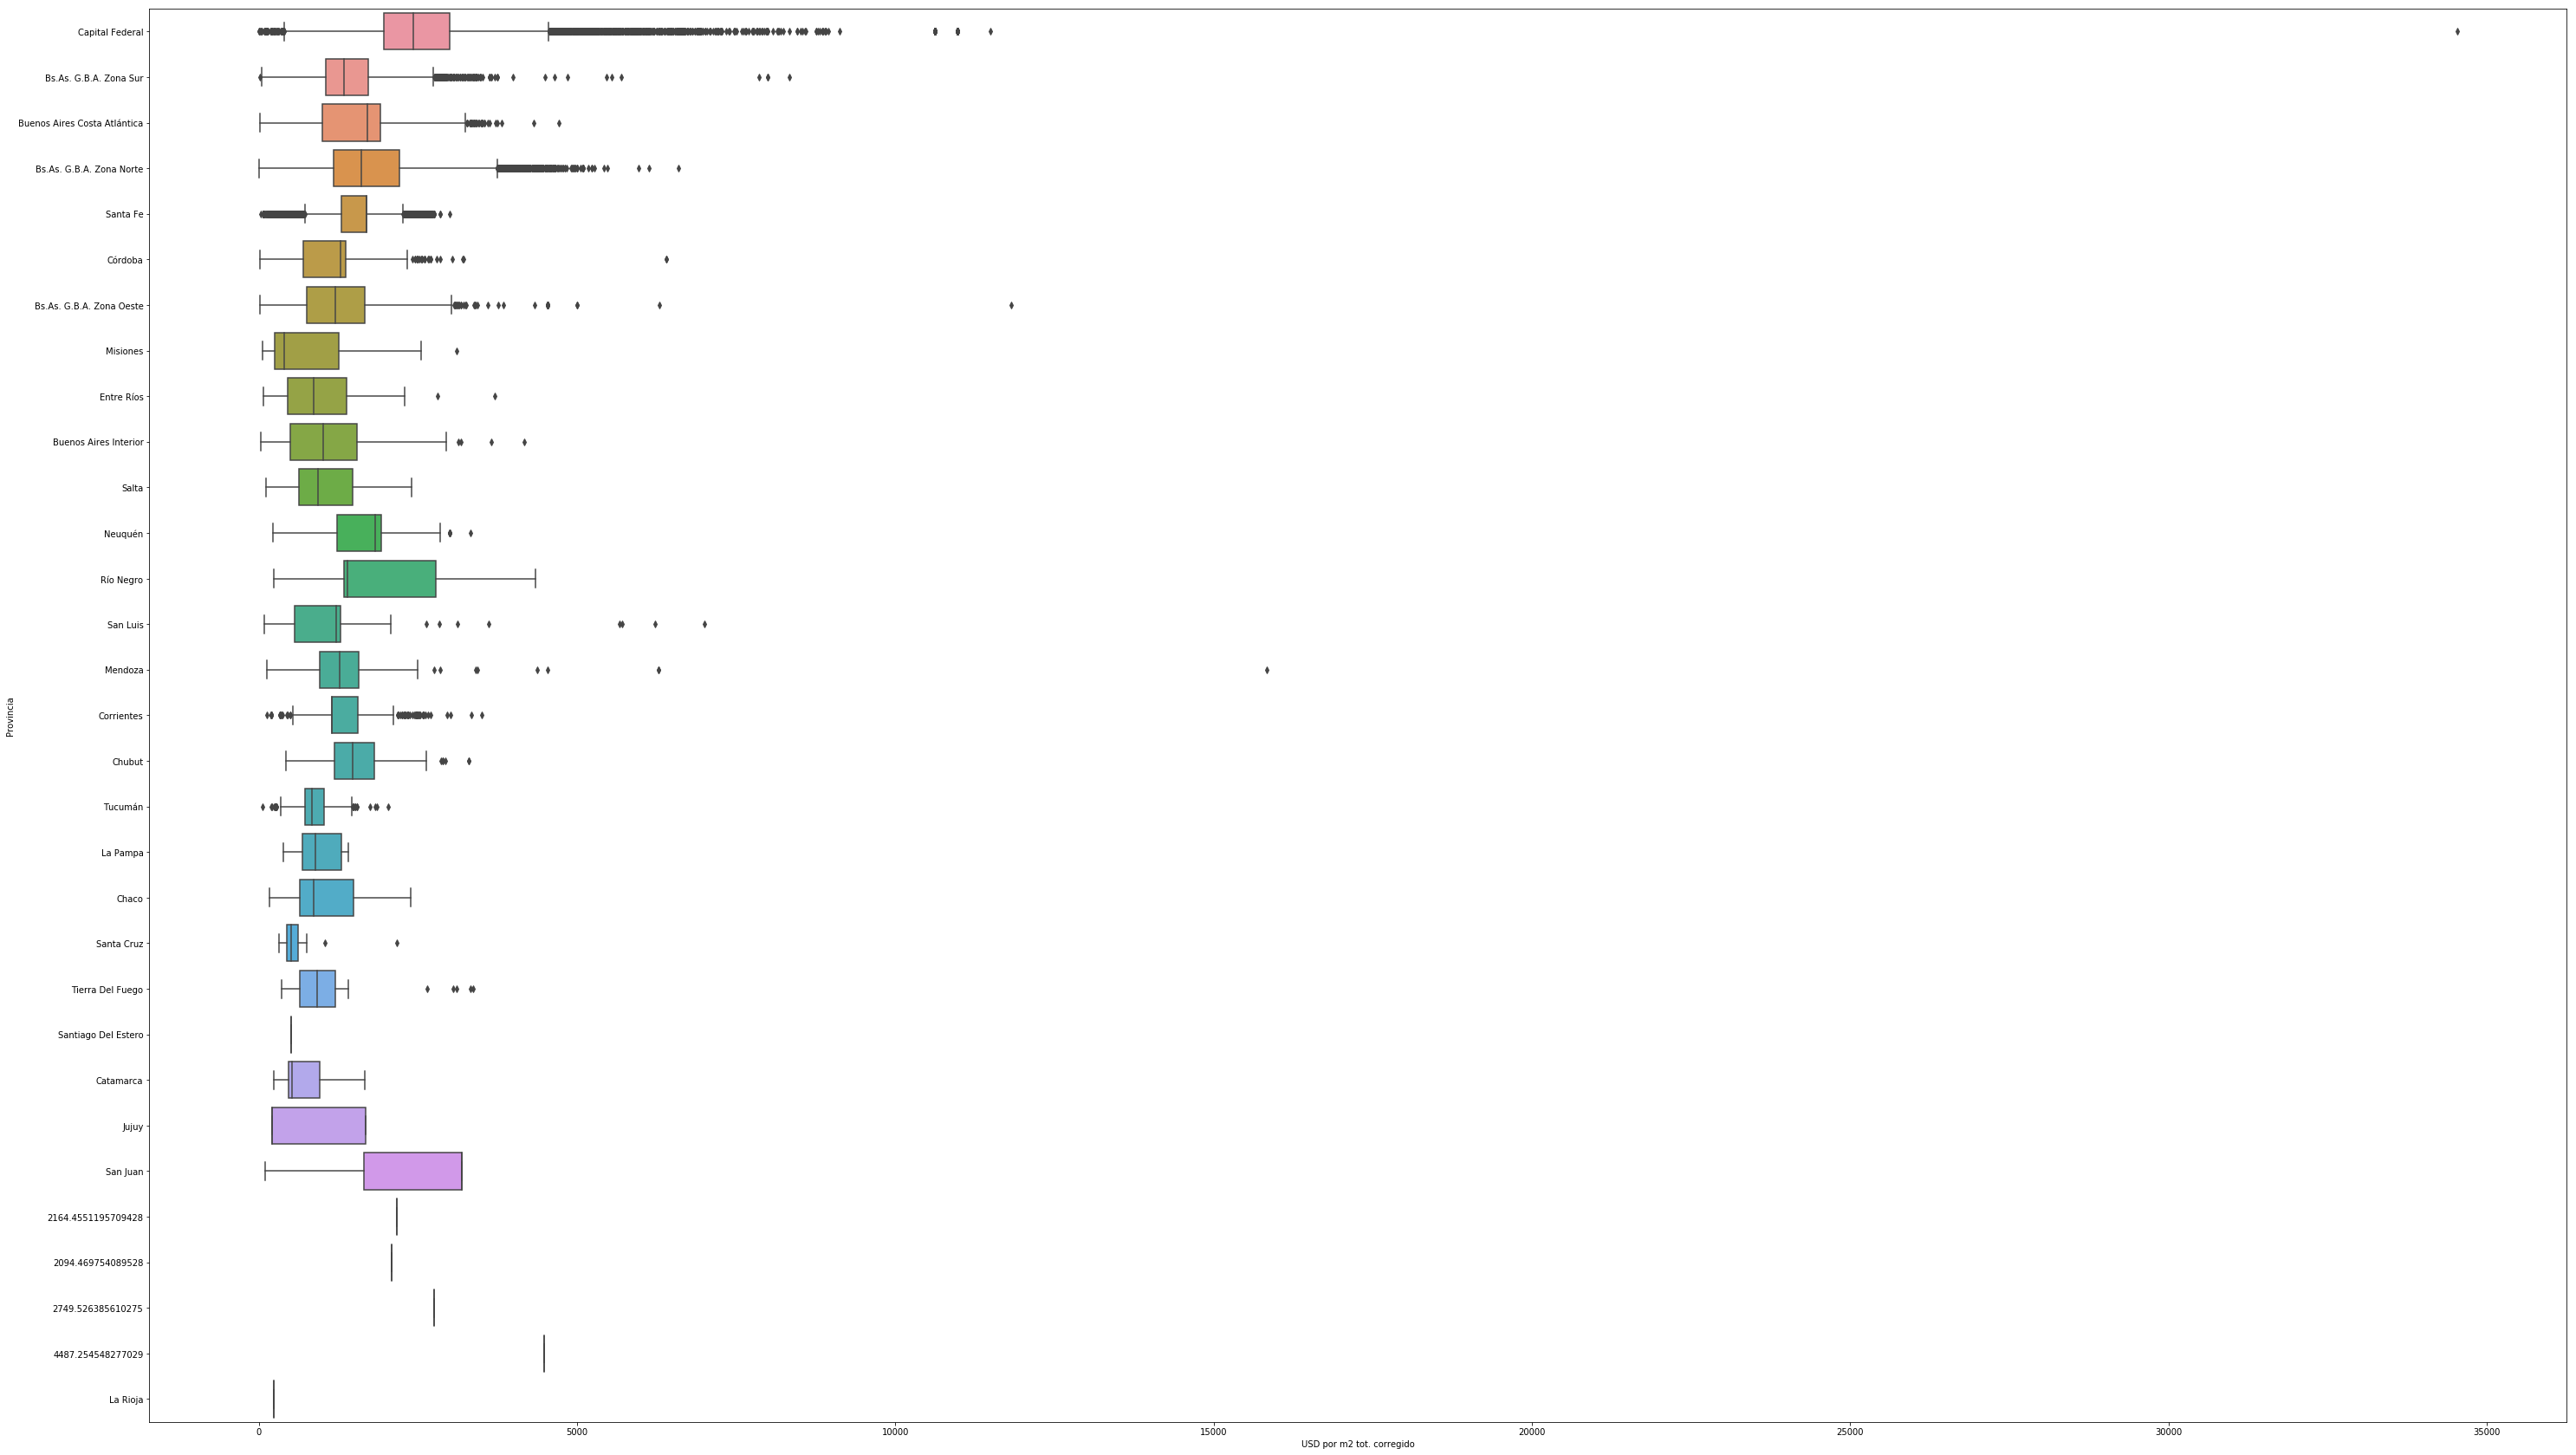

In [671]:
#USD por m2 total
plt.figure(figsize=(50,30))
sns.boxplot(data=df_properatti_final,x='USD por m2 tot. corregido',y='Provincia')

Se puede ver en el gráfico que, para ambos casos, a partir de los USD 10.000 por m2 son outliers

In [672]:
#Se analizan dichos casos
df_properatti_final[['Localidad','Precio aprox USD','M2 totales','M2 cubiertos','USD por m2 tot. corregido',
                     'USD por m2 cub. corregido']][((df_properatti_final['USD por m2 cub. corregido']>10000)|
                                                   (df_properatti_final['USD por m2 tot. corregido']>10000))].head(30)

,Localidad,Precio aprox USD,M2 totales,M2 cubiertos,USD por m2 tot. corregido,USD por m2 cub. corregido
1579,Boedo,80000.00,NaN,35.0,10618.736257,2285.714286
1936,Comodoro Rivadavia,NaN,NaN,NaN,2221.666667,11050.144757
1937,Comodoro Rivadavia,NaN,NaN,NaN,2221.666667,11050.144757
4448,Boedo,225000.00,NaN,145.0,10618.736257,1551.724138
4768,San Cristobal,195000.00,NaN,115.0,10974.102476,1695.652174
5312,San Cristobal,78000.00,NaN,58.0,10974.102476,1344.827586
6095,San Cristobal,110000.00,NaN,43.0,10974.102476,2558.139535
6556,San Cristobal,69000.00,NaN,NaN,10974.102476,9756.780443
7008,San Cristobal,90000.00,NaN,41.0,10974.102476,2195.121951
7098,San Cristobal,119000.00,NaN,53.0,10974.102476,2245.283019


In [673]:
#Se detecta que hay casos en los que M2 totales = M2 cubiertos. Se analizan
df_properatti_final[['Localidad','Precio aprox USD','M2 totales','M2 cubiertos','USD por m2 tot. corregido',
                     'USD por m2 cub. corregido']][((df_properatti_final['USD por m2 cub. corregido']>10000)|
                                                   (df_properatti_final['USD por m2 tot. corregido']>10000))&
                                                   (df_properatti_final['M2 totales']==df_properatti_final[
                                                       'M2 cubiertos'])]

,Localidad,Precio aprox USD,M2 totales,M2 cubiertos,USD por m2 tot. corregido,USD por m2 cub. corregido
25446,San Cristobal,532600.0,40.0,40.0,522.854342,13858.240505
25845,San Cristobal,635600.0,40.0,40.0,1002.169683,11618.701009
25952,San Cristobal,936500.0,40.0,40.0,2769.726628,10807.015512
25955,San Cristobal,956200.0,40.0,40.0,1584.094078,11389.605470
26011,San Cristobal,905632.0,40.0,40.0,2806.842747,10462.841652
26186,San Cristobal,847510.0,33.0,33.0,2700.841601,11446.971080
26244,San Cristobal,812470.0,33.0,33.0,2824.800557,10365.668606
26325,San Cristobal,854240.0,33.0,33.0,3378.788824,11649.865061
26501,San Cristobal,879000.0,38.0,38.0,1426.452460,14659.021918
34587,San Miguel,750000.0,36.0,36.0,1617.945689,20833.333333


In [674]:
#No son demasiados casos, pero se puede ver que el precio por m2 total se pudo corregir y el cubierto no. Dado que
#la cantidad de m2 cubiertos y totales es la misma, se replica el valor de m2 totales para m2 cubiertos
df_properatti_final.loc[((df_properatti_final['USD por m2 cub. corregido']>10000)|
                                                (df_properatti_final['USD por m2 tot. corregido']>10000))&
                                                (df_properatti_final['M2 totales']==df_properatti_final['M2 cubiertos']),
                        'USD por m2 cub. corregido']=df_properatti_final['USD por m2 tot. corregido']

In [675]:
#Se analizan los casos que quedaron con más de USD 10.000 por m2 cubierto ó total.
#Son 200 registros
#Se detecta que en la mayoría de de los casos no se tiene la cantidad de m2 cubiertos ó totales, no son datos
#que se puedan corregir.
df_properatti_final[['Localidad','Precio aprox USD','M2 totales','M2 cubiertos','USD por m2 tot. corregido',
                     'USD por m2 cub. corregido']][((df_properatti_final['USD por m2 cub. corregido']>=10000)|
                                                   (df_properatti_final['USD por m2 tot. corregido']>=10000))].head(30)


,Localidad,Precio aprox USD,M2 totales,M2 cubiertos,USD por m2 tot. corregido,USD por m2 cub. corregido
1579,Boedo,80000.00,NaN,35.0,10618.736257,2285.714286
1936,Comodoro Rivadavia,NaN,NaN,NaN,2221.666667,11050.144757
1937,Comodoro Rivadavia,NaN,NaN,NaN,2221.666667,11050.144757
4448,Boedo,225000.00,NaN,145.0,10618.736257,1551.724138
4768,San Cristobal,195000.00,NaN,115.0,10974.102476,1695.652174
5312,San Cristobal,78000.00,NaN,58.0,10974.102476,1344.827586
6095,San Cristobal,110000.00,NaN,43.0,10974.102476,2558.139535
6556,San Cristobal,69000.00,NaN,NaN,10974.102476,9756.780443
7008,San Cristobal,90000.00,NaN,41.0,10974.102476,2195.121951
7098,San Cristobal,119000.00,NaN,53.0,10974.102476,2245.283019


In [676]:
df_properatti_final.shape

(113511, 25)

In [677]:
#Se decide eliminar dichos outliers
df_properatti_final=df_properatti_final[(df_properatti_final['USD por m2 cub. corregido']<10000)&
                                        (df_properatti_final['USD por m2 tot. corregido']<10000)]

df_properatti_final.shape


(113311, 25)

In [678]:
df_properatti_final['USD por m2 cub. corregido'].describe()

count    113311.000000
mean       2022.341267
std         985.331198
min         102.820000
25%        1371.428571
50%        1856.996265
75%        2456.140351
max        9998.592328
Name: USD por m2 cub. corregido, dtype: float64

In [ ]:
df_properatti_final['USD por m2 tot. corregido'].describe()

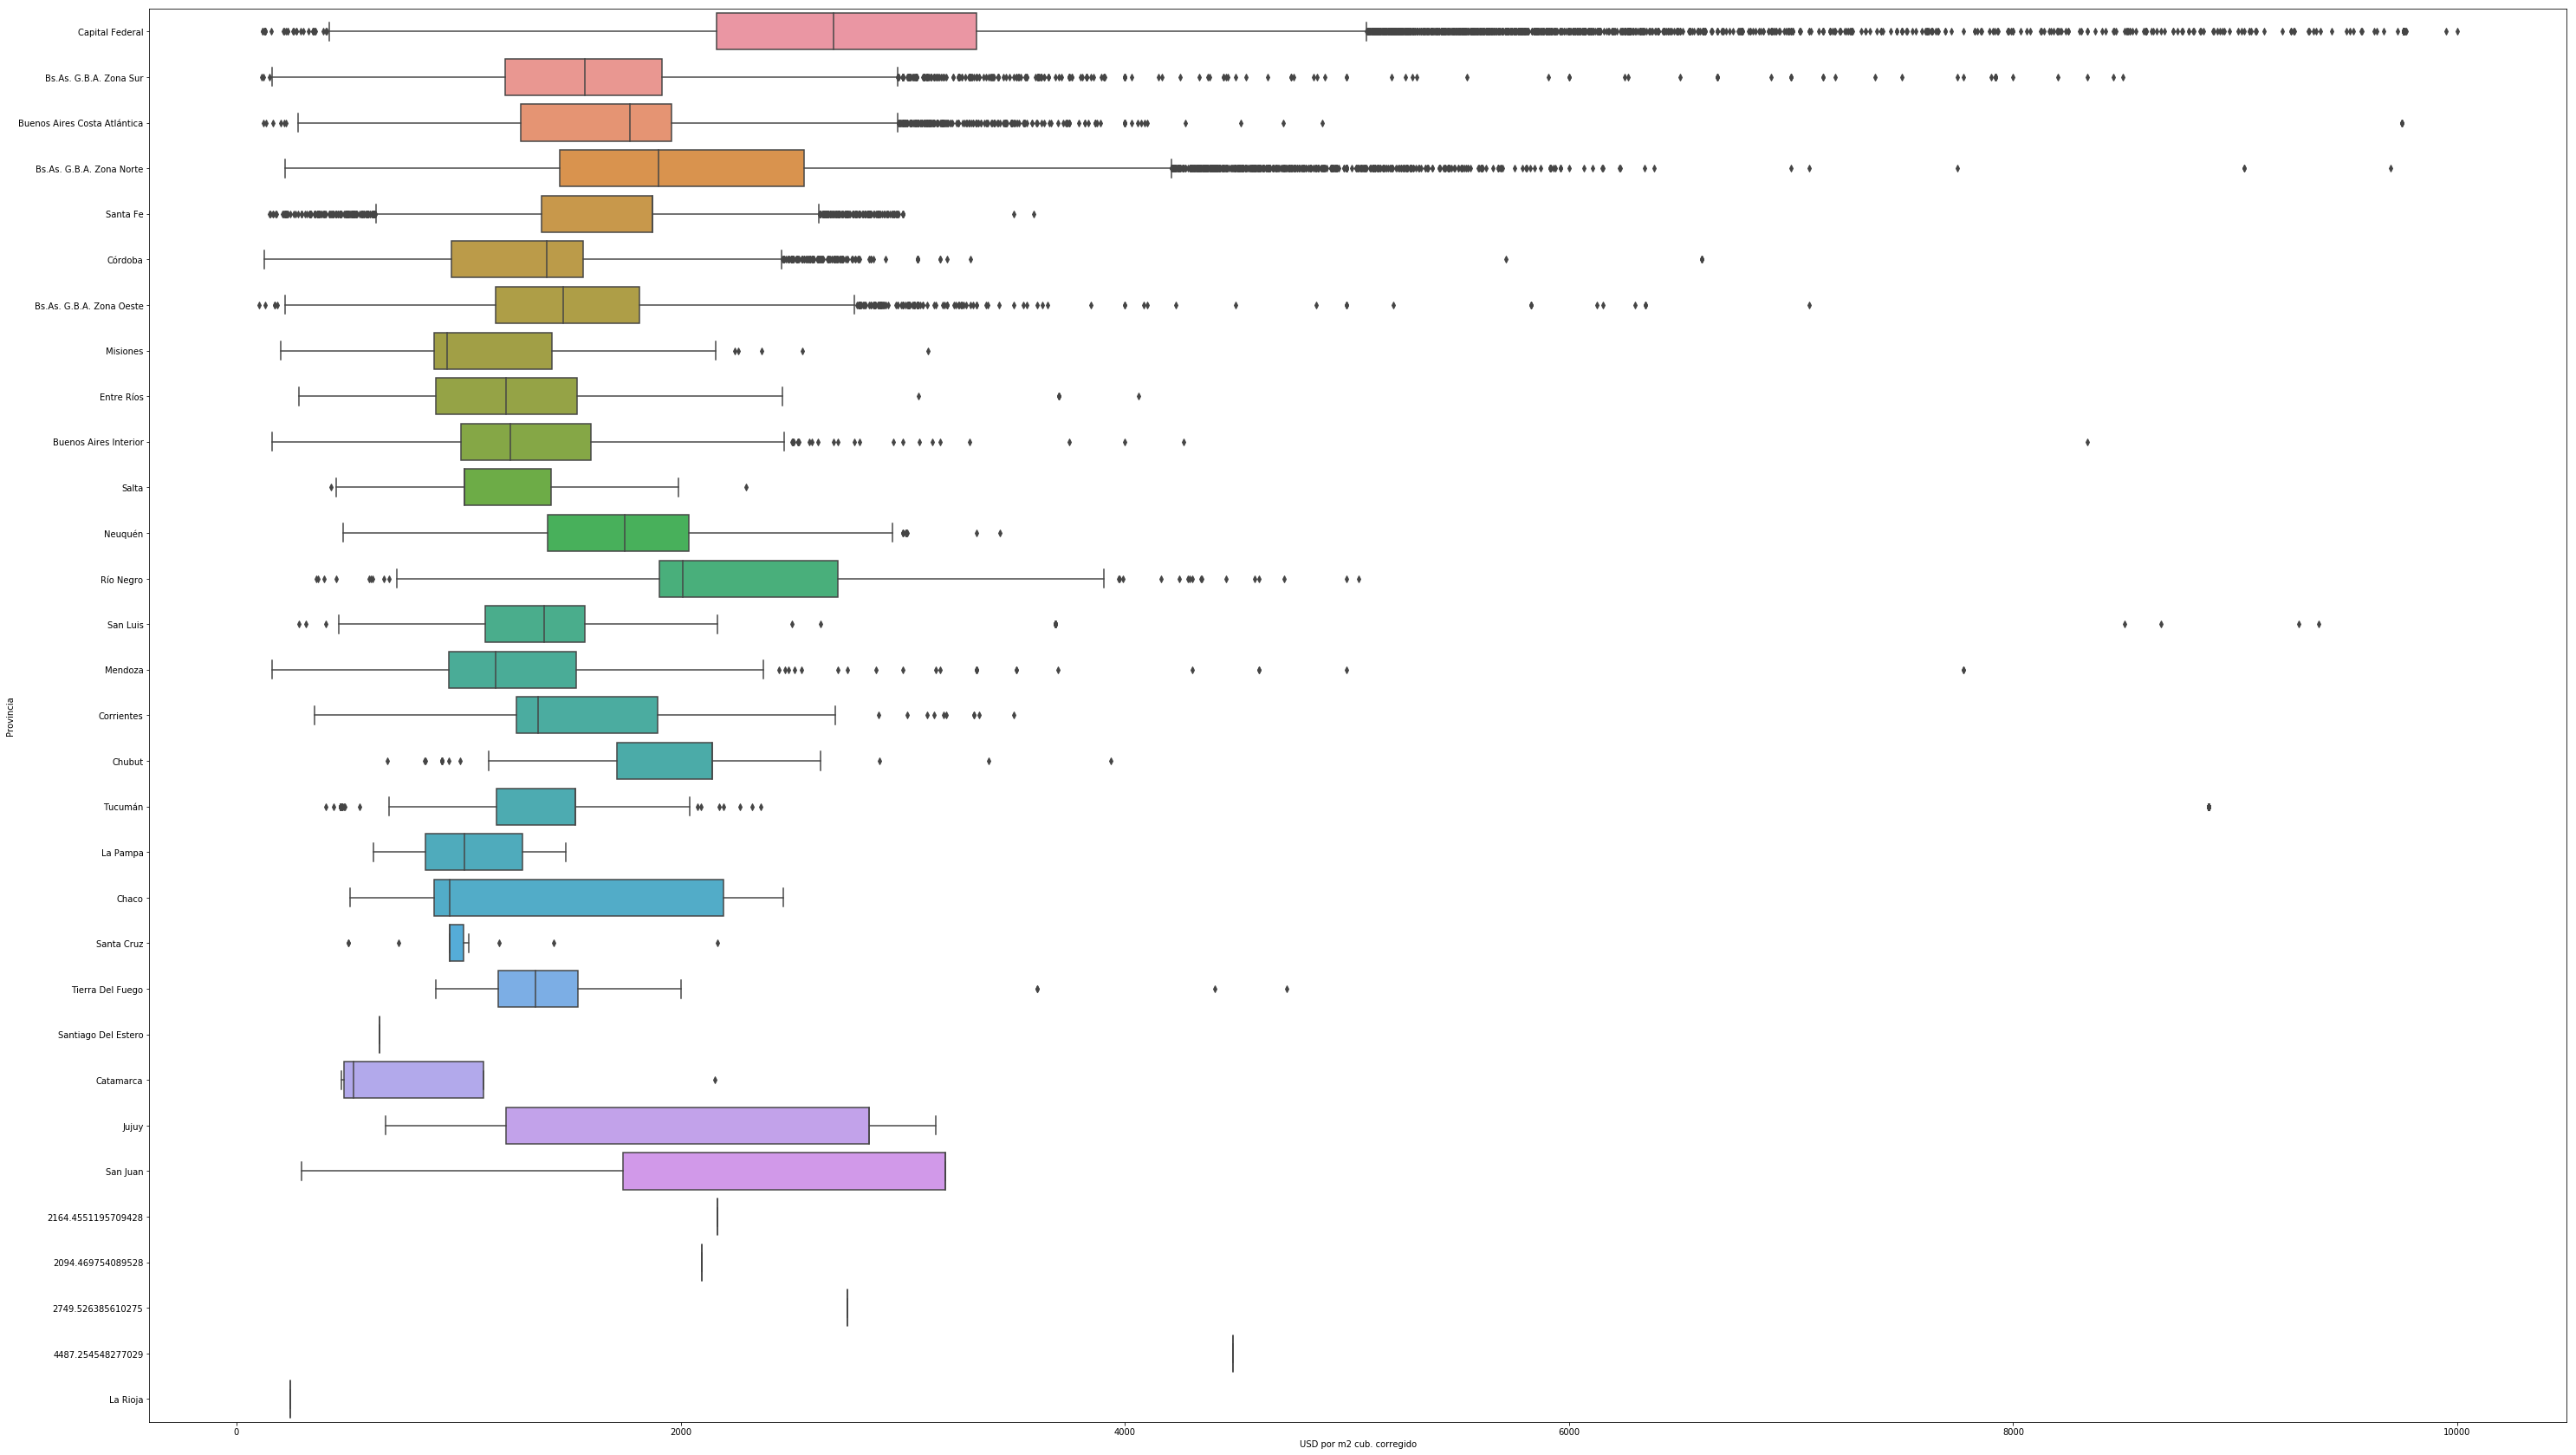

In [680]:
#Se grafican nuevamente
#USD por m2 cubierto
plt.figure(figsize=(50,30))
sns.boxplot(data=df_properatti_final,x='USD por m2 cub. corregido',y='Provincia')


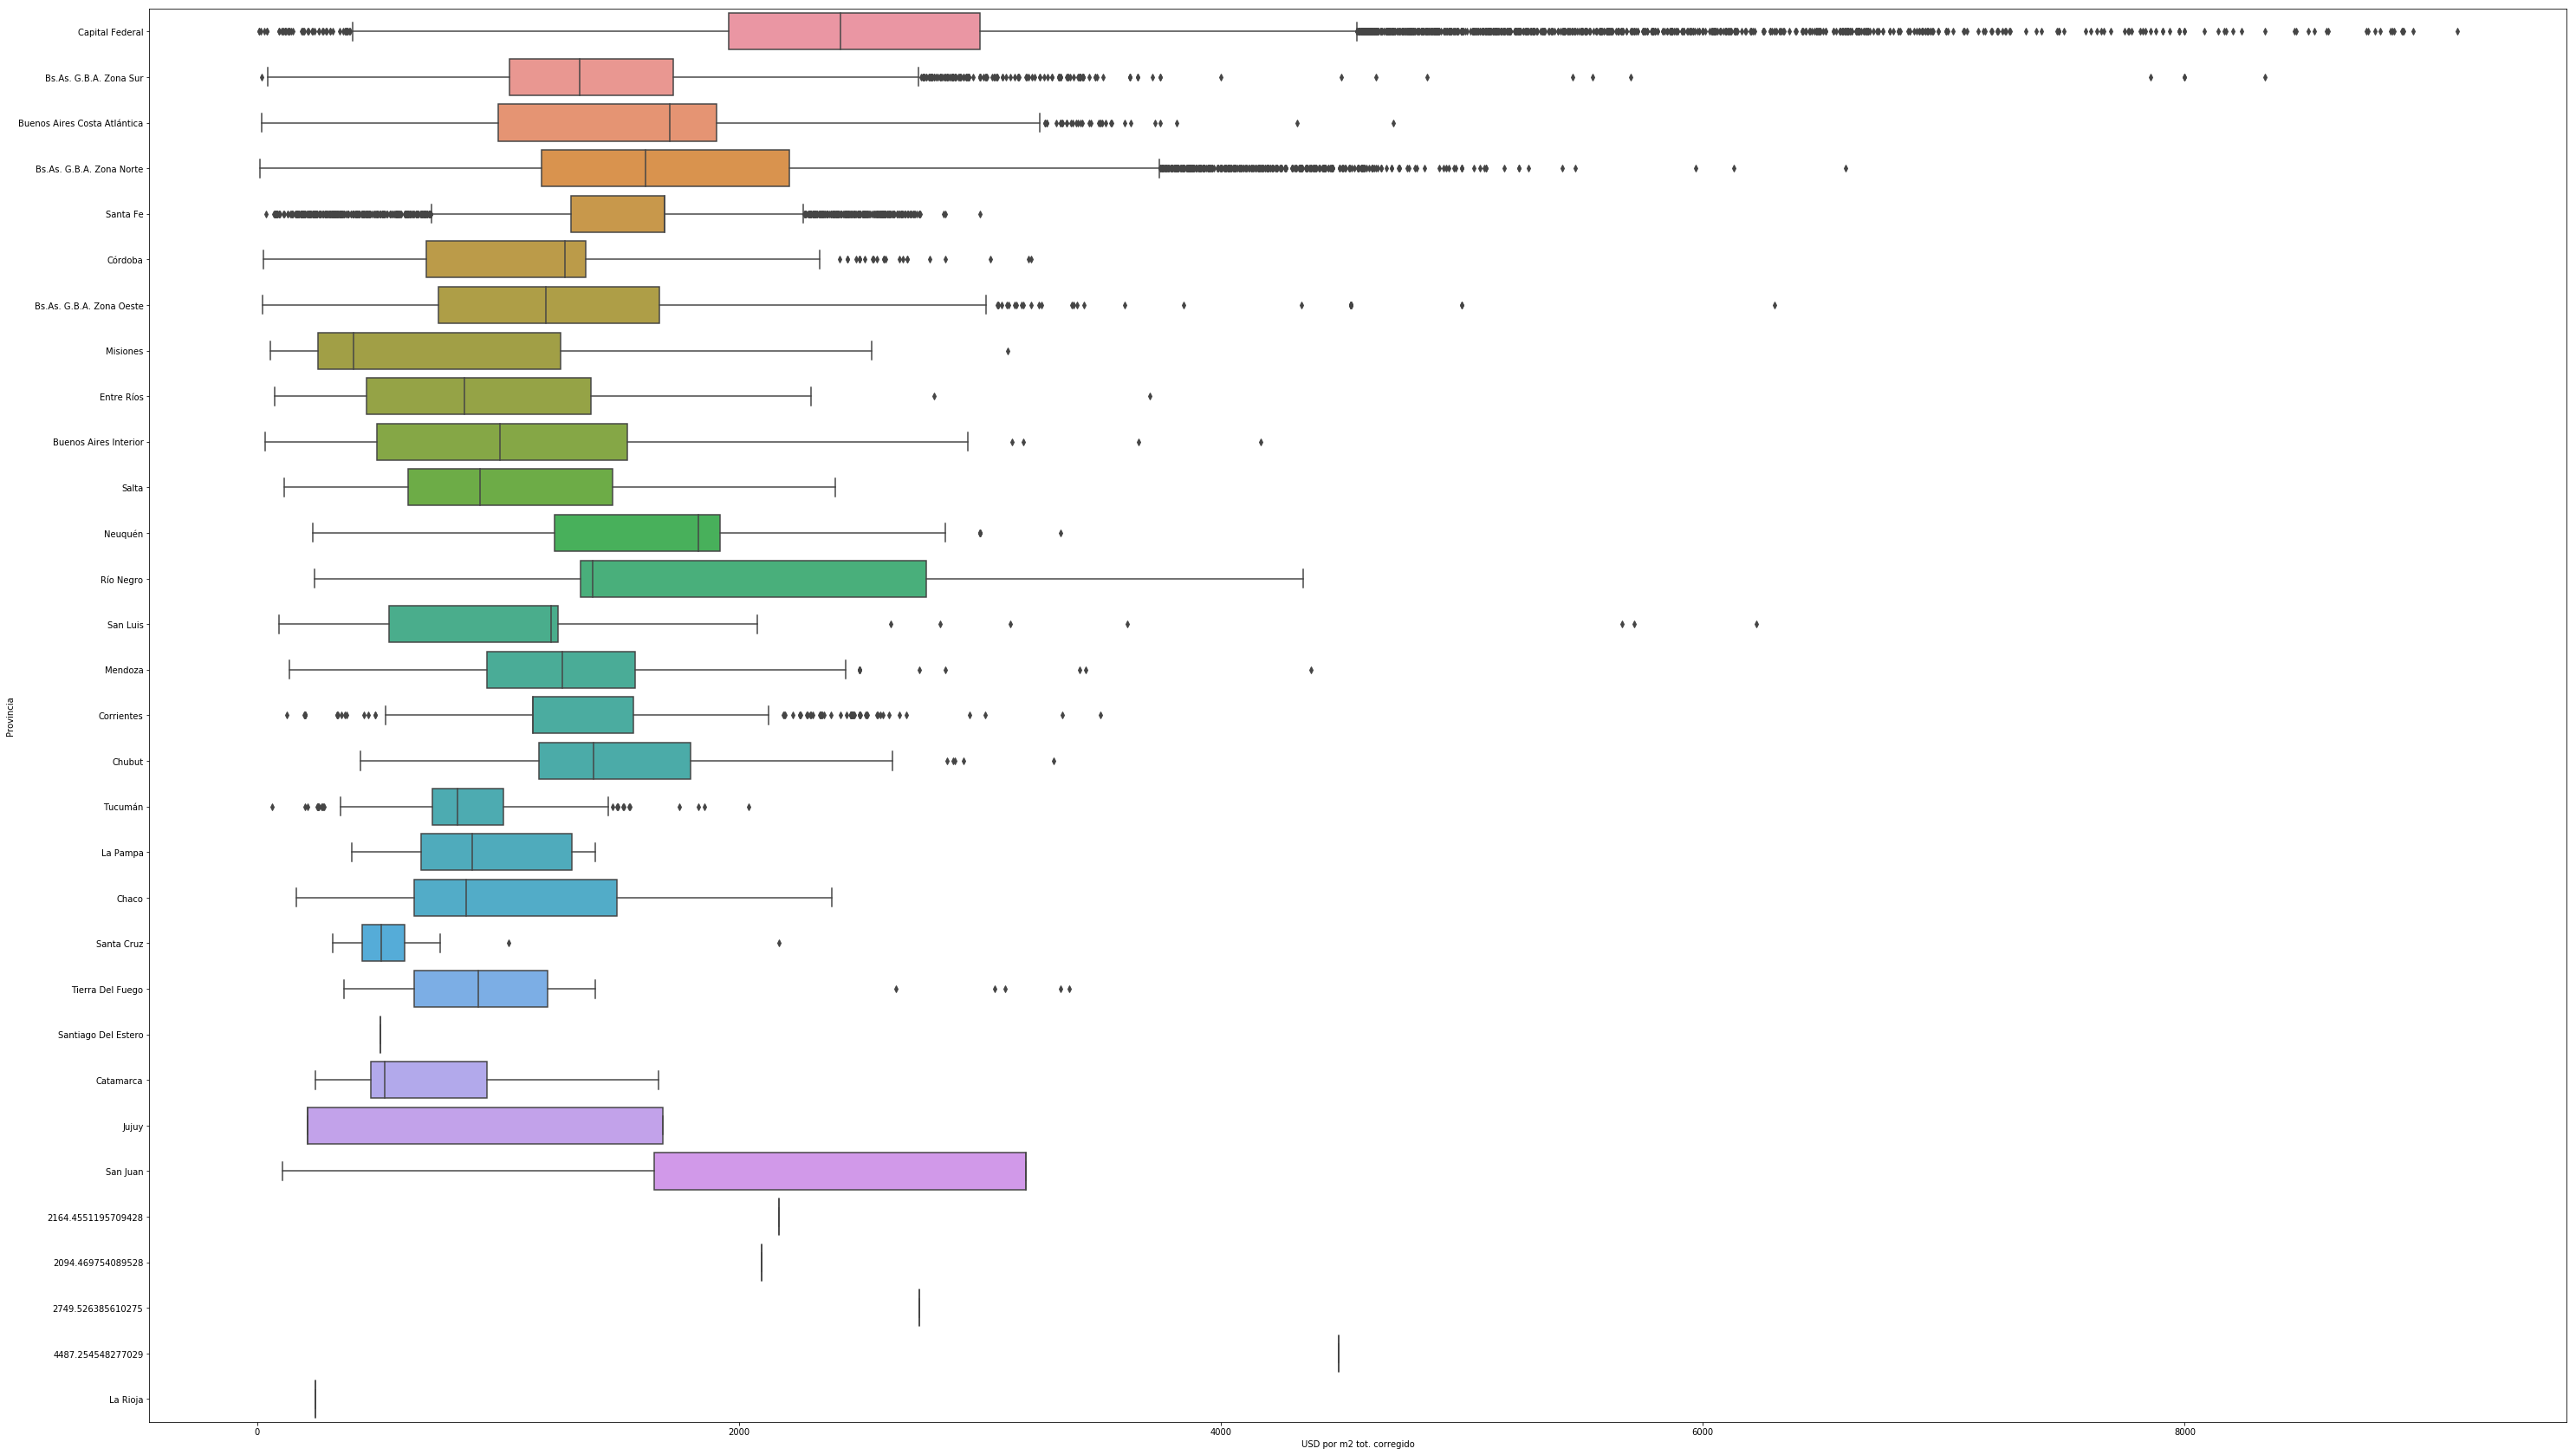

In [681]:
#Se grafican nuevamente
#USD por m2 cubierto
plt.figure(figsize=(50,30))
sns.boxplot(data=df_properatti_final,x='USD por m2 tot. corregido',y='Provincia')
